In [1]:
! pip install tensorflow==2.15.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 26.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 28.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 32.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 19.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 6.0 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.16.0
    Uninstalling wrapt-1.16.0:
      Successfully uninstalled wrapt-1.16.0
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: keras
    Found existing installation: keras 3.5.0
    Uninstalling keras-3.5.0:
      Successfully uninstalled keras-3.5.0
  Attempting uninstall: tensorboard
    Found existing installation

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle competitions download -c rossmann-store-sales

 57% 4.00M/6.99M [00:00<00:00, 6.04MB/s]
100% 6.99M/6.99M [00:01<00:00, 7.04MB/s]


In [ ]:
! unzip rossmann-store-sales.zip

Archive:  rossmann-store-sales.zip
  inflating: sample_submission.csv   
  inflating: store.csv               
  inflating: test.csv                
  inflating: train.csv               


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn import  model_selection, feature_selection, svm, metrics, pipeline, preprocessing, metrics
from tqdm import tqdm

import pickle
# tensorflow version
tf.__version__


'2.15.1'

# Read the dataset

In [ ]:
# read the training, testing and store infromation dataset
full_training_dataset = pd.read_csv('train.csv')
full_store_dataset = pd.read_csv('store.csv')
full_testing_dataset   = pd.read_csv('test.csv')



<ipython-input-10-27d0cf9ed79a>:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  full_training_dataset = pd.read_csv('train.csv')


In [ ]:
# show the store information dataset
full_store_dataset

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [ ]:
# show the training dataset
full_training_dataset

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [ ]:
# show the testing dataset

full_testing_dataset

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0
...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1.0,0,0,0
41084,41085,1112,6,2015-08-01,1.0,0,0,0
41085,41086,1113,6,2015-08-01,1.0,0,0,0
41086,41087,1114,6,2015-08-01,1.0,0,0,0


## Marge the files with store dataset infromation

In [ ]:
# Merging the training dataset with store information on the 'Store' column
# This combines each store's data in the training dataset with its corresponding store details from the store dataset will be use as training dataset
dataset = pd.merge(full_training_dataset, full_store_dataset, on='Store')

# Merging the testing dataset with store information on the 'Store' column
# This ensures that the testing dataset has the same additional store details as the training dataset
testing_dataset = pd.merge(full_testing_dataset, full_store_dataset, on='Store')


In [ ]:
dataset

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


## Get Iformation about the dataset

### Columns infroamtion

In [ ]:
# Displaying a summary of the merged dataset.
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

In [ ]:

# cheack the messing values
pd.isnull(dataset).sum()

,0
Store,0
DayOfWeek,0
Date,0
Sales,0
Customers,0
Open,0
Promo,0
StateHoliday,0
SchoolHoliday,0
StoreType,0


In [ ]:
# cheack the messing values
pd.isnull(testing_dataset).sum()

,0
Id,0
Store,0
DayOfWeek,0
Date,0
Open,11
Promo,0
StateHoliday,0
SchoolHoliday,0
StoreType,0
Assortment,0


In [ ]:
# Filtering the testing dataset to display rows where the 'Open' column has missing (null) values
testing_dataset[testing_dataset['Open'].isnull()]


,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
479,480,622,4,2015-09-17,NaN,1,0,0,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
1335,1336,622,3,2015-09-16,NaN,1,0,0,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
2191,2192,622,2,2015-09-15,NaN,1,0,0,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
3047,3048,622,1,2015-09-14,NaN,1,0,0,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
4759,4760,622,6,2015-09-12,NaN,0,0,0,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
5615,5616,622,5,2015-09-11,NaN,0,0,0,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
6471,6472,622,4,2015-09-10,NaN,0,0,0,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
7327,7328,622,3,2015-09-09,NaN,0,0,0,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
8183,8184,622,2,2015-09-08,NaN,0,0,0,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
9039,9040,622,1,2015-09-07,NaN,0,0,0,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN


## Preprocessor the Dataset

Certainly! Here's how you might present this as a structured note cell in a Colab notebook to clearly communicate the purpose and steps of the `DatasetPreprocessor` class:

---

### Note: Preprocessing Pipeline Overview for the Rossmann Sales Prediction Dataset

The `DatasetPreprocessor` class is designed to prepare the Rossmann dataset for deep learning by handling data cleaning, feature engineering, and encoding. This pipeline ensures the dataset is ready for modeling with consistent formatting and transformed features. Below is an outline of each step in this preprocessing workflow, along with the rationale behind each transformation:

1. **Cleaning the Dataset**
   - The `clean_dataset` method fills missing values (NaNs) with 0. Through initial data exploration, it was observed that missing values generally represent logical absences, such as no nearby competitors or non-participation in specific promotions. By replacing these values with 0, we ensure they are interpretable by the model.
   - Numeric strings are also standardized by converting them to integers, which maintains a consistent numeric format required for model input.

2. **Extracting Date Components**
   - Using the `create_year_month_day_column` method, the `Date` column is split into separate `Year`, `Month`, and `Day` columns. This decomposition allows the model to capture temporal patterns more effectively, such as daily, monthly, and seasonal trends, without complex date parsing.

3. **Generating Unique Integer IDs for Categorical Features**
   - The `genrate_unique_id_str` method maps categorical features (`StateHoliday`, `StoreType`, `Assortment`, and `PromoInterval`) to unique integer IDs. Deep learning models typically require numeric inputs, so this mapping converts categorical strings into integer labels for easier processing.
   - These mappings are saved for later use, making it straightforward to revert to original values if needed during predictions.

4. **Encoding Categorical Columns**
   - With the `convert_str_to_id` method, the mappings are applied to replace categorical values in the dataset with their corresponding integer IDs. Unlike one-hot encoding, integer encoding is more efficient in this deep learning context, helping to reduce dimensionality while preserving categorical information.

5. **Executing the Preprocessing Pipeline**
   - The `__call__` method coordinates the entire preprocessing pipeline, ensuring a smooth, consistent transformation from raw data to a model-ready format. This structured approach simplifies both training and inference, ensuring reproducibility and consistency across different phases.


In [ ]:

class DatasetPreprocessor:
    """
    A class to preprocess datasets by handling data cleaning, feature engineering, and encoding of categorical variables.

    Attributes
    ----------
    dataset : pd.DataFrame
        The dataset to be preprocessed.
    id_to_str : dict
        A dictionary to map integer IDs back to their original string representations for categorical columns.
    str_to_id : dict
        A dictionary to map unique strings in categorical columns to integer IDs.

    Methods
    -------
    convert_str_to_number(str):
        Converts a string to an integer if it represents a number; otherwise, returns the original string.

    create_year_month_day_column(dataset):
        Extracts 'Year', 'Month', and 'Day' columns from a 'Date' column in the dataset.

    clean_dataset():
        Fills NaN values with 0 and converts numeric strings to integers in the dataset.

    genrate_unique_id_str(dataset, column_name):
        Generates unique integer IDs for specified categorical columns and creates mappings.

    convert_str_to_id(dataset, column_name):
        Replaces categorical values with their corresponding IDs in specified columns.

    convert_id_to_str(dataset, column_name):
        Converts integer IDs back to original string representations in specified columns.

    __call__():
        Runs the entire preprocessing pipeline in sequence.
    """

    def __init__(self, dataset):
        """
        Initializes the preprocessor with the provided dataset.

        Parameters
        ----------
        dataset : pd.DataFrame
            The dataset to be preprocessed.
        """
        self.dataset = dataset  # Store the provided dataset as an attribute

         # Generate unique ID mappings for specified categorical columns
        self.genrate_unique_id_str(dataset, ['StateHoliday', 'StoreType', 'Assortment', "PromoInterval"])

    def convert_str_to_number(self, str):
        """
        Converts a string to an integer if it represents a number, otherwise returns the original string.

        Parameters
        ----------
        str : str
            The input string to be checked and possibly converted to an integer.

        Returns
        -------
        int or str
            The converted integer if the string was a number, otherwise the original string.
        """
        try:
            # Attempt to convert the string to an integer
            return int(str)
        except ValueError:
            # Return the original string if it cannot be converted to an integer
            return str

    def create_year_month_day_column(self, dataset):
        """
        Adds 'Year', 'Month', and 'Day' columns to the dataset based on the 'Date' column.

        Parameters
        ----------
        dataset : pd.DataFrame
            The dataset to add new date-based columns to.

        Returns
        -------
        pd.DataFrame
            The dataset with additional 'Year', 'Month', and 'Day' columns.
        """
        # Convert 'Date' column to datetime format to extract date components
        dataset['Date'] = pd.to_datetime(dataset['Date'])

        # Extract year from 'Date' and store it in 'Year' column
        dataset['Year'] = dataset['Date'].dt.year.astype(int)

        # Extract month from 'Date' and store it in 'Month' column
        dataset['Month'] = dataset['Date'].dt.month.astype(int)

        # Extract day from 'Date' and store it in 'Day' column
        dataset['Day'] = dataset['Date'].dt.day.astype(int)

        return dataset  # Return the modified dataset

    def clean_dataset(self,dataset):
        """
        Cleans the dataset by filling NaN values with 0 and converting numeric strings to integers.

        Returns
        -------
        pd.DataFrame
            The cleaned dataset with NaN values replaced and numeric strings converted to integers.
        """
        # Replace NaN values in the dataset with 0
        dataset = dataset.fillna(0)

        # Apply convert_str_to_number to each element in the dataset to standardize data types
        dataset = dataset.applymap(self.convert_str_to_number)

        return dataset  # Return the cleaned dataset

    def generate_unique_id_str(self, dataset, column_name: list):
        """
        Generates unique integer IDs for specified categorical columns and creates mappings for encoding and decoding.

        Parameters
        ----------
        dataset : pd.DataFrame
            The dataset containing the categorical columns to be encoded.
        column_name : list
            List of column names to generate unique IDs for.
        """
        # Initialize dictionaries for mappings
        self.id_to_str = {}  # Maps integer IDs to strings
        self.str_to_id = {}  # Maps strings to integer IDs

        for col in column_name:
            # Initialize mappings for each column
            id_to_str = {}
            str_to_id = {}

            # Enumerate unique values in the column
            for id, word in enumerate(dataset[col].unique()):
                # Skip if value is 0 (e.g., filled or missing values)
                if word == 0:
                    continue

                # Map integer ID to string and vice versa
                id_to_str[id + 1] = word
                str_to_id[word] = id + 1

            # Store mappings for the column
            self.id_to_str[col] = id_to_str
            self.str_to_id[col] = str_to_id

    def convert_str_to_id(self, dataset, column_name: list):
        """
        Replaces categorical string values with their corresponding IDs in specified columns.

        Parameters
        ----------
        dataset : pd.DataFrame
            The dataset containing the columns to be transformed.
        column_name : list
            List of column names where string values should be replaced by IDs.

        Returns
        -------
        pd.DataFrame
            The dataset with specified columns transformed to integer IDs.
        """
        for col in column_name:
            # Replace string values with integer IDs based on the stored mappings
            dataset[col].replace(self.str_to_id[col], inplace=True)

        return dataset  # Return the dataset with encoded columns

    def convert_id_to_str(self, dataset, column_name: list):
        """
        Converts integer IDs back to their original string representations in specified columns.

        Parameters
        ----------
        dataset : pd.DataFrame
            The dataset containing the columns to be transformed.
        column_name : list
            List of column names where integer IDs should be replaced by the original strings.

        Returns
        -------
        pd.DataFrame
            The dataset with specified columns transformed back to original string values.
        """
        for col in column_name:
            # Replace integer IDs with original string values based on the stored mappings
            dataset[col].replace(self.id_to_str[col], inplace=True)

        return dataset  # Return the dataset with decoded columns

    def __call__(self,dataset):
        """
        Executes the entire preprocessing pipeline in sequence:
        - Cleans the dataset
        - Adds year, month, and day columns
        - Generates unique IDs for specified categorical columns
        - Encodes categorical columns with integer IDs

        Returns
        -------
        pd.DataFrame
            The fully preprocessed dataset ready for modeling.
        """
        # Clean the dataset by handling NaN values and standardizing numeric strings
        dataset = self.clean_dataset(dataset)

        # Add 'Year', 'Month', and 'Day' columns extracted from 'Date'
        dataset = self.create_year_month_day_column(dataset)

        # Encode categorical columns by replacing strings with integer IDs
        dataset = self.convert_str_to_id(dataset, ['StateHoliday', 'StoreType', 'Assortment', 'PromoInterval'])

        return dataset  # Return the fully preprocessed dataset


In [ ]:
# Instantiate the DatasetPreprocessor class with the dataset to be preprocessed
dataset_preprocessor = DatasetPreprocessor(dataset)



# Call the preprocessor instance to execute the entire preprocessing pipeline on the dataset
# This includes cleaning, feature engineering, and encoding categorical columns
cleaned_dataset = dataset_preprocessor(dataset)

# Display the resulting cleaned and preprocessed dataset
cleaned_dataset


<ipython-input-20-5af476da8718>:114: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  dataset = dataset.applymap(self.convert_str_to_number)
<ipython-input-20-5af476da8718>:170: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset[col].replace(self.str_to_id[col], inplace=True)
<ipython-input-20-5af476da8718>:170: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day
0,1,5,2015-07-31,5263,555,1,1,0,1,1,...,1270,9,2008,0,0,0,0,2015,7,31
1,2,5,2015-07-31,6064,625,1,1,0,1,2,...,570,11,2007,1,13,2010,2,2015,7,31
2,3,5,2015-07-31,8314,821,1,1,0,1,2,...,14130,12,2006,1,14,2011,2,2015,7,31
3,4,5,2015-07-31,13995,1498,1,1,0,1,1,...,620,9,2009,0,0,0,0,2015,7,31
4,5,5,2015-07-31,4822,559,1,1,0,1,2,...,29910,4,2015,0,0,0,0,2015,7,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,2,1,2,...,1900,6,2014,1,31,2013,2,2013,1,1
1017205,1112,2,2013-01-01,0,0,0,0,2,1,1,...,1880,4,2006,0,0,0,0,2013,1,1
1017206,1113,2,2013-01-01,0,0,0,0,2,1,2,...,9260,0,0,0,0,0,0,2013,1,1
1017207,1114,2,2013-01-01,0,0,0,0,2,1,2,...,870,0,0,0,0,0,0,2013,1,1


In [ ]:
cleaned_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 21 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  int64         
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  int64         
 10  Assortment                 1017209 non-null  int64         
 11  CompetitionDistance        1017209 no

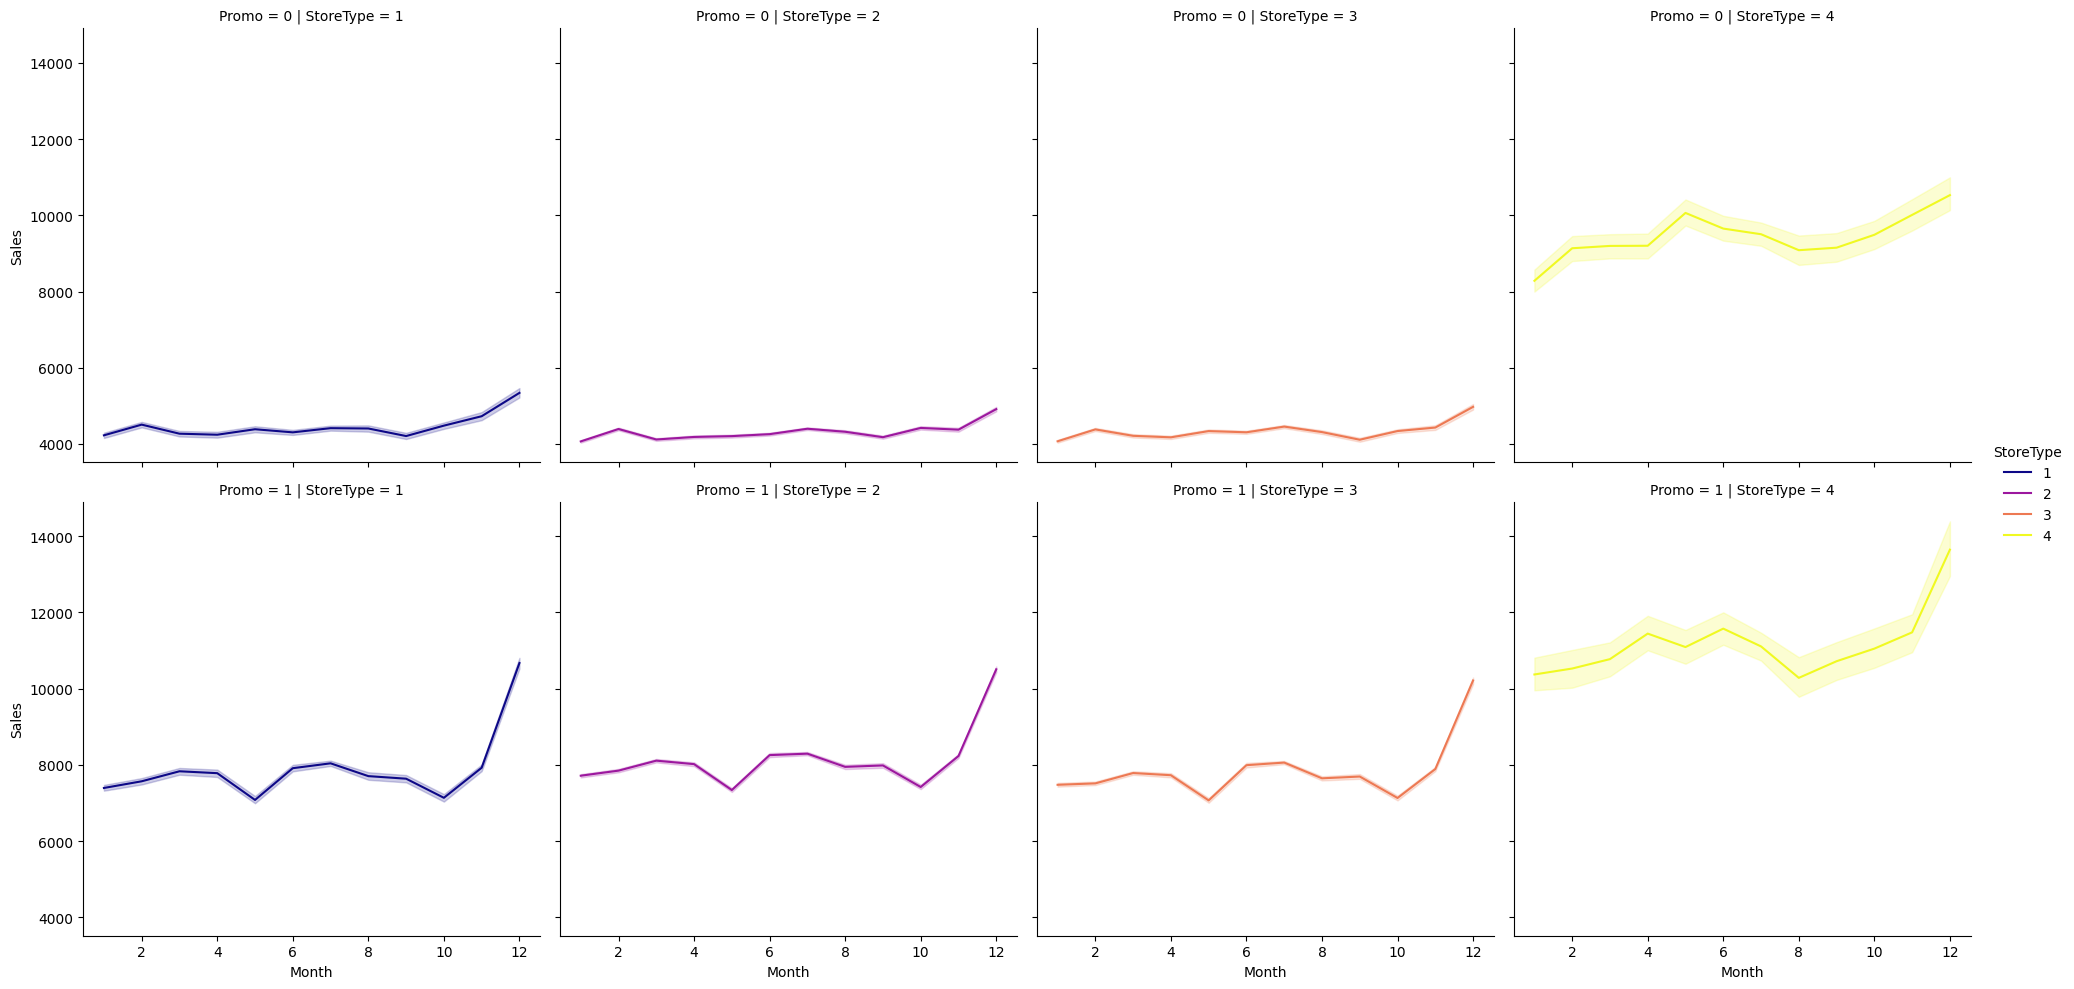

In [ ]:
# sales trends
sns.relplot(data = cleaned_dataset, x = 'Month', y = "Sales",
               col = 'StoreType', # per store type in cols
               palette = 'plasma',
               hue = 'StoreType',
               row = 'Promo', # per promo in the store in rows,
            kind="line"
               )

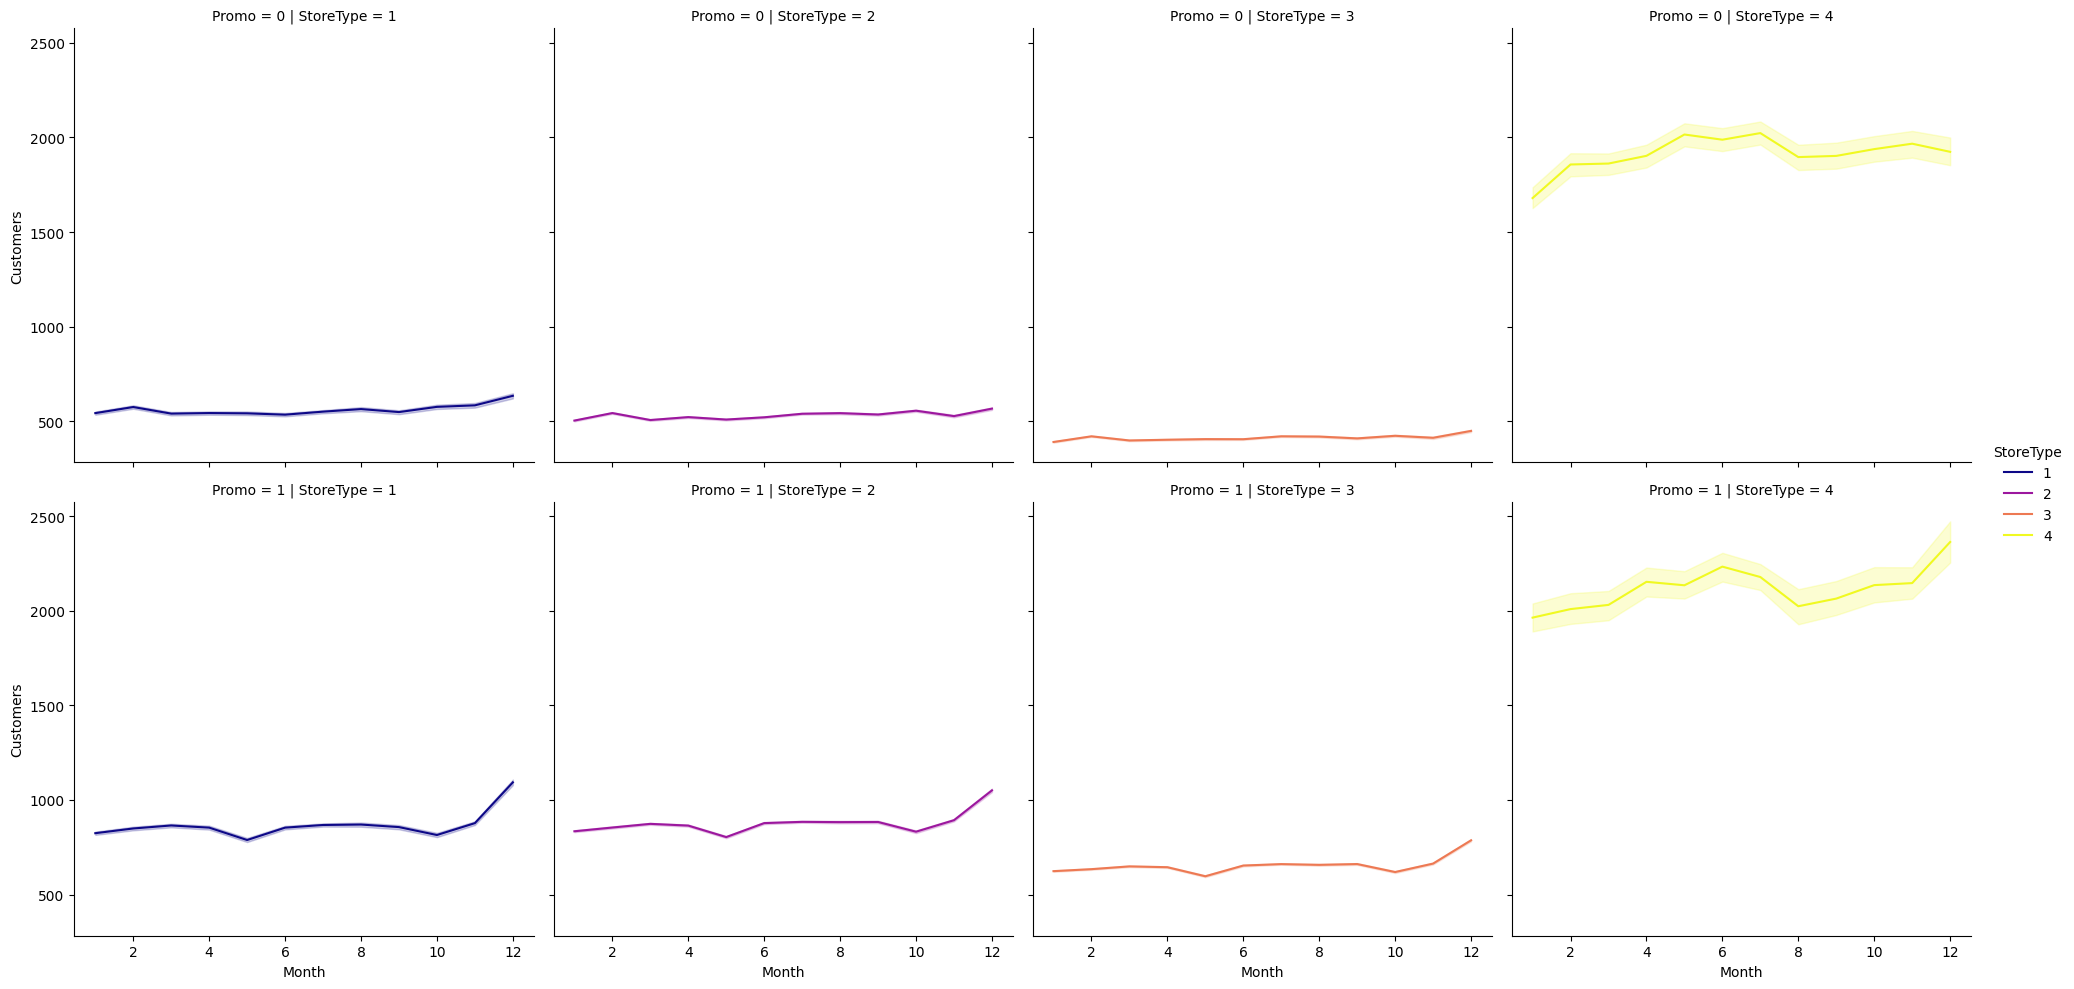

In [ ]:
# sales trends
sns.relplot(data = cleaned_dataset, x = 'Month', y = "Customers",
               col = 'StoreType', # per store type in cols
               palette = 'plasma',
               hue = 'StoreType',
               row = 'Promo', # per promo in the store in rows
            kind="line"
               )


All store types exhibit a similar trend, but the scale of this trend varies depending on the presence of the initial promotion (Promo) and the specific StoreType 2.

At this stage, it’s clear that sales increase significantly as the Christmas holiday approaches. A more detailed analysis of seasonality and trends will follow in the Time Series Analysis section.

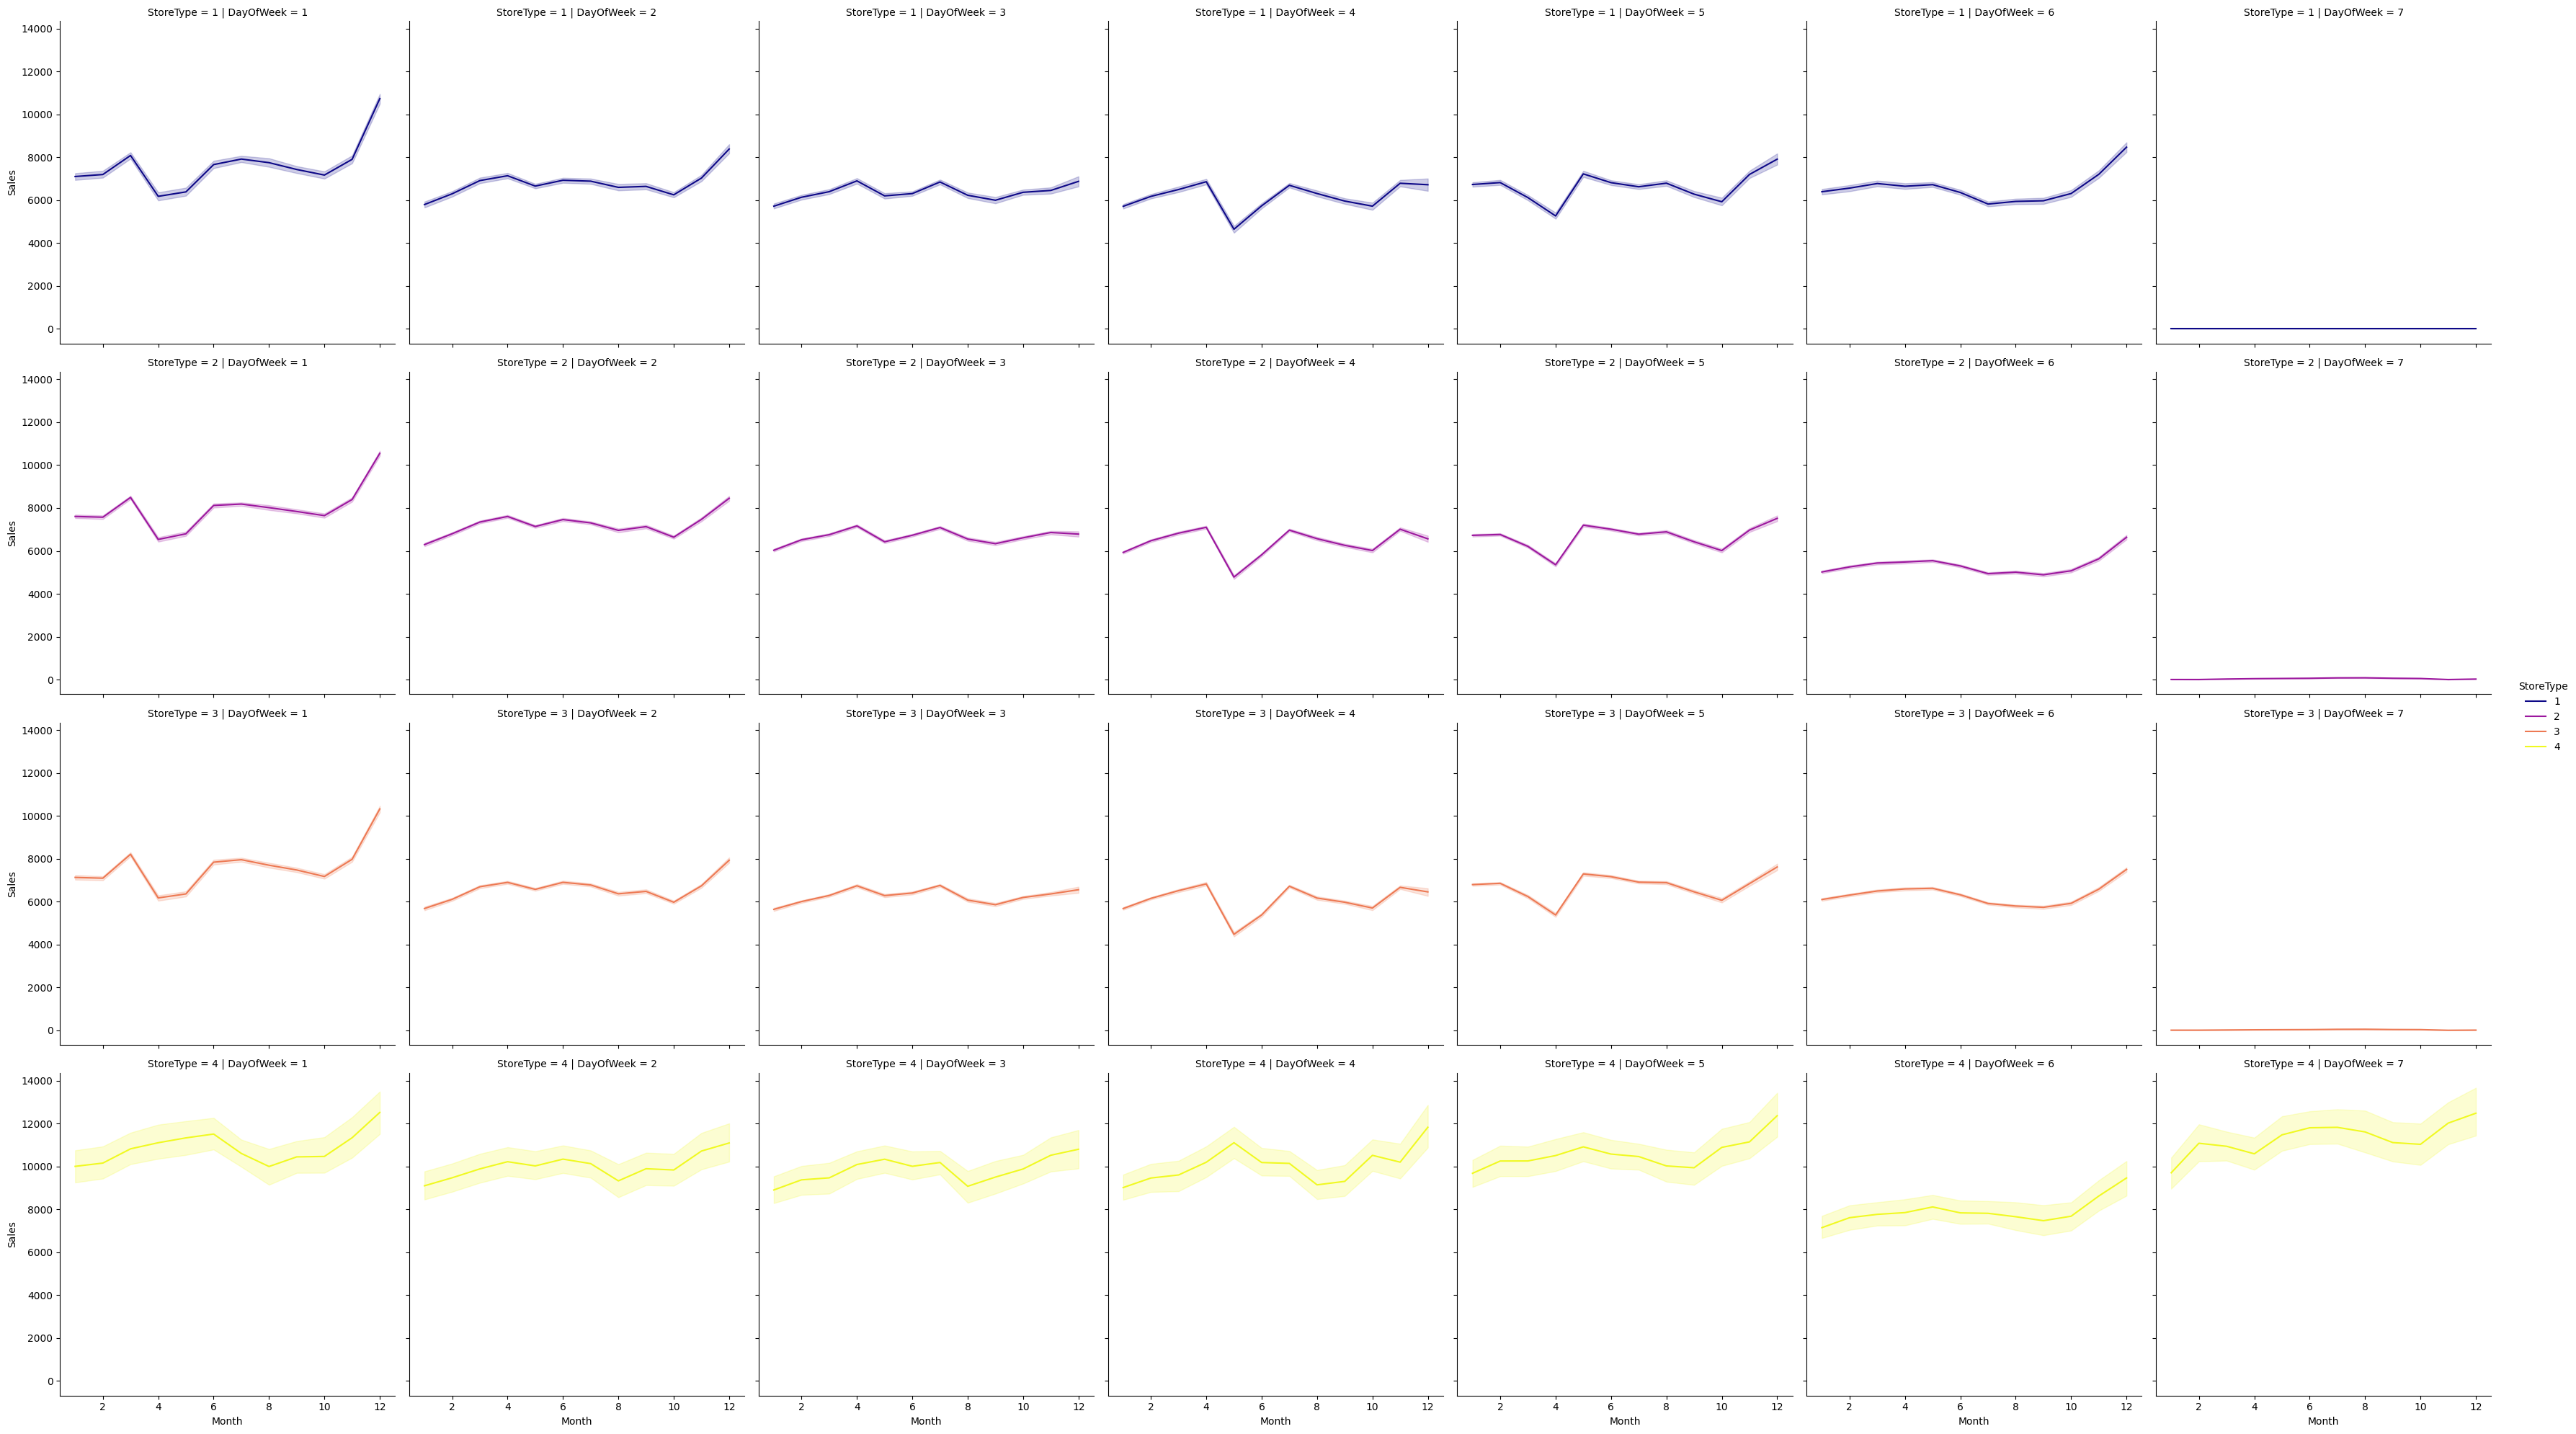

In [ ]:
# customers
sns.relplot(data = cleaned_dataset, x = 'Month', y = "Sales",
               col = 'DayOfWeek', # per store type in cols
               palette = 'plasma',
               hue = 'StoreType',
               row = 'StoreType', # per store type in rows
               kind = 'line')

The stores that are open on Sundays are predominantly of StoreType 4, as shown in the data. While StoreTypes 1, 2, and 3 remain closed on Sundays throughout the year, StoreType 4 operates on Sundays.

In [ ]:
#cleaned_dataset.drop(['Date'],axis=1,inplace=True)

<Axes: >

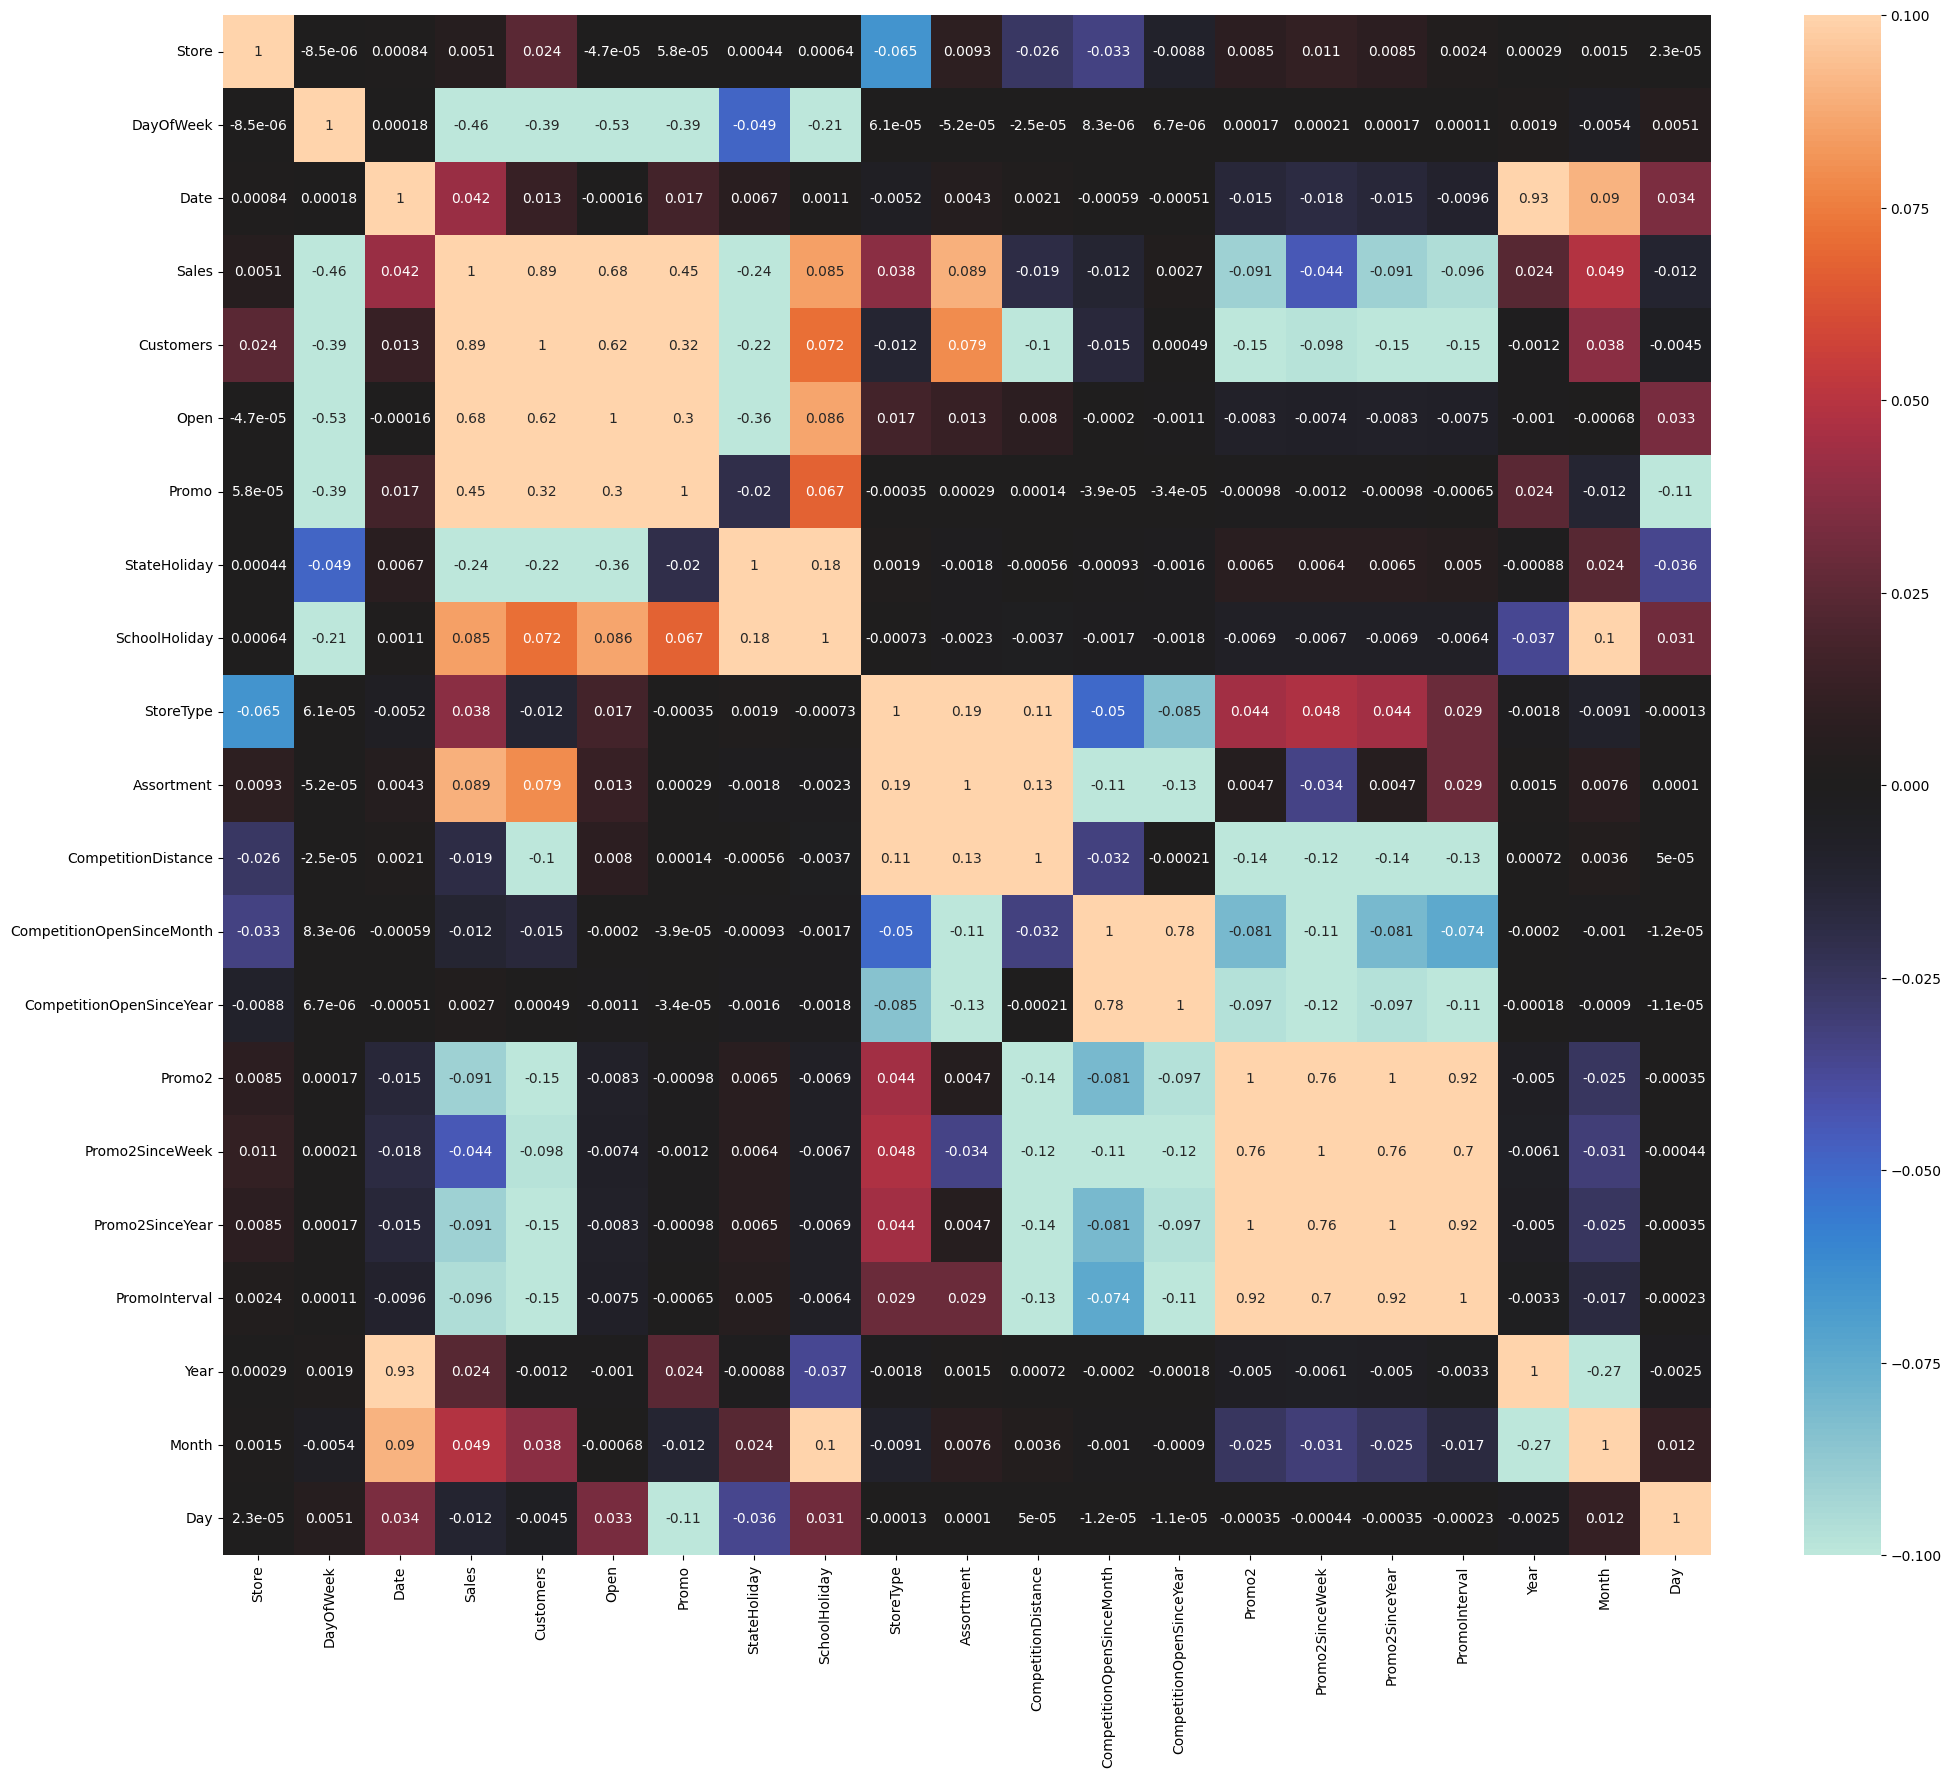

In [ ]:
# Set up the figure size for the heatmap to ensure it’s large and readable
plt.subplots(figsize=(24, 20))

# Generate a heatmap to visualize the correlation between features and the label
# 'annot=True' displays the correlation values on the heatmap
# 'vmin' and 'vmax' set the color scale limits to focus on correlations between -0.1 and 0.1
# 'center=0' centers the color map on 0 to differentiate positive and negative correlations
sns.heatmap(cleaned_dataset.corr(), annot=True, vmin=-0.1, vmax=0.1, center=0)


s previously observed, there is a strong positive correlation between the number of sales and the number of customers for a store. Additionally, we see a positive correlation between an active promotion (Promo = 1) and the number of customers.

However, when a store continues a consecutive promotion (Promo2 = 1), the number of customers and sales tends to either stabilize or decrease, as indicated by the slight negative correlation in the heatmap. A similar negative correlation is noticeable between the presence of a promotion and certain days of the week.

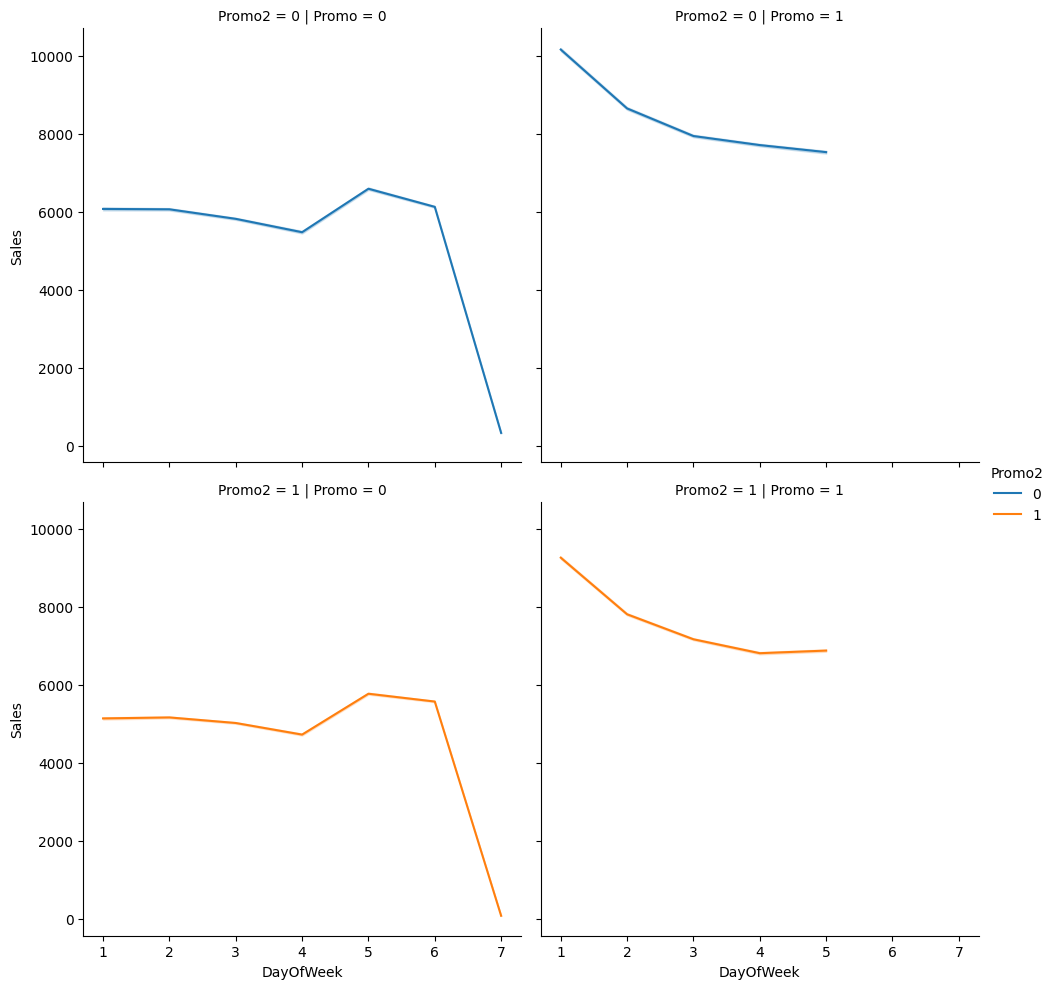

In [ ]:
# sale per customer trends
sns.relplot(data = cleaned_dataset, x = 'DayOfWeek', y = "Sales",
               col = 'Promo',
               row = 'Promo2',
               hue = 'Promo2',
               kind = 'line')

There are several insights to consider here:

1. When there is no promotion (both Promo and Promo2 are equal to 0), sales tend to peak on Sunday. However, since StoreType 2 is closed on Sundays, this peak primarily reflects data from StoreTypes 1, 2, and 3.

2. In contrast, stores running a promotion (Promo = 1) tend to achieve the highest sales on Monday. This trend could offer useful guidance for Rossmann's marketing campaigns.

3. Stores with both promotions active (Promo and Promo2 both equal to 1) also follow a similar pattern, with sales peaking on Monday.

4. Promo2 on its own does not appear to correlate with any significant change in sales, as indicated by the pale blue area on the heatmap shown earlier.

In [ ]:
cleaned_dataset

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day
0,1,5,2015-07-31,5263,555,1,1,0,1,1,...,1270,9,2008,0,0,0,0,2015,7,31
1,2,5,2015-07-31,6064,625,1,1,0,1,2,...,570,11,2007,1,13,2010,2,2015,7,31
2,3,5,2015-07-31,8314,821,1,1,0,1,2,...,14130,12,2006,1,14,2011,2,2015,7,31
3,4,5,2015-07-31,13995,1498,1,1,0,1,1,...,620,9,2009,0,0,0,0,2015,7,31
4,5,5,2015-07-31,4822,559,1,1,0,1,2,...,29910,4,2015,0,0,0,0,2015,7,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,2,1,2,...,1900,6,2014,1,31,2013,2,2013,1,1
1017205,1112,2,2013-01-01,0,0,0,0,2,1,1,...,1880,4,2006,0,0,0,0,2013,1,1
1017206,1113,2,2013-01-01,0,0,0,0,2,1,2,...,9260,0,0,0,0,0,0,2013,1,1
1017207,1114,2,2013-01-01,0,0,0,0,2,1,2,...,870,0,0,0,0,0,0,2013,1,1


In [ ]:
# Calculate the correlation of each feature with the target variable 'Sales'
# Sort the correlations in ascending order for easier analysis of which features are most and least correlated with 'Sales'
correlations = cleaned_dataset.corr()['Sales'].sort_values()
correlations


,Sales
DayOfWeek,-0.462125
StateHoliday,-0.244512
PromoInterval,-0.095965
Promo2SinceYear,-0.091056
Promo2,-0.091040
Promo2SinceWeek,-0.044143
CompetitionDistance,-0.018609
CompetitionOpenSinceMonth,-0.012431
Day,-0.011612
CompetitionOpenSinceYear,0.002749



### Feature Selection Based on Correlation with Sales

1. **Correlation Analysis**
   - To identify features most strongly associated with the target variable, `Sales`, a correlation analysis was conducted. Each feature's correlation with `Sales` was calculated, and the results were sorted in ascending order. This method helps reveal both positive and negative correlations, providing insight into which features may be the most predictive.

2. **Selecting Relevant Features**
   - Based on the correlation analysis, a subset of features was selected for further analysis and model training. The selected features include:
     - **Store**: Each store’s unique identifier, likely capturing differences in location, size, and customer base.
     - **Date**, **Month**, and **Day**: Temporal variables to help capture seasonality and daily trends in sales.
     - **StoreType**: Differentiates between store models, which may influence sales patterns.
     - **DayOfWeek**: Captures weekly patterns, as sales may vary by day of the week.
     - **StateHoliday** and **Promo**: Indicate whether state holidays or promotions occurred, which can significantly impact sales.
     - **Open**: Indicates whether the store was open on a given day, crucial for calculating sales on operational days only.
    
     - **Sales**: The target variable for prediction.

3. **Creating a New Dataset with Selected Features**
   - A new dataset was created containing only the selected features, simplifying the dataset and focusing on variables most correlated with `Sales`. This filtered dataset will serve as a foundation for training models that aim to predict future sales.

This approach reduces dimensionality and improves model interpretability by retaining only the features most relevant to the prediction task, potentially enhancing model performance.


# Feature Selection

In [ ]:
# Define a function to split our dataset into train/test splits using indices
def train_test_split(x, y, train_indices, test_indices):
    return x[train_indices], x[test_indices], y[train_indices], y[test_indices]

In [ ]:
# Define the cross validation method
kfold = model_selection.ShuffleSplit(n_splits=10,random_state=42)
# Define empty dictionary for records
# k equal to number Features to Select
best_k = {
    'k':[],
    'f1_score':[],
    'recall_score':[],
    'precision_score':[]
}
# get random 30% of the dataset just for feature selactions
cleaned_dataset_random_sample = cleaned_dataset.sample(frac=0.05).copy()
y = cleaned_dataset_random_sample['Sales']
x = cleaned_dataset_random_sample.drop(['Sales'],axis=1)
x_norm = preprocessing.normalize(x)
y_norm = preprocessing.normalize(y.values.reshape(-1,1))
for k in tqdm(range(len(x.columns))):
    f1_score = []
    recall_score = []
    precision_score = []
    k +=1

    # Create the linear model
    lsvr = svm.SVR(kernel='linear',max_iter=-1)
    # Define the feature selection method
    feature_selector = feature_selection.RFE(lsvr,n_features_to_select=k)
    # fit the feature Selection method on the x_norm and y
    feature_selector.fit(x_norm,y)
    # get the new fetures
    new_x = feature_selector.transform(x_norm)

    # Evaluate svm on the features for defiant k values form 1 to 20
    for train_indexes,test_indexes in kfold.split(new_x,y):

        x_train,x_test,y_train,y_test = train_test_split(new_x,y,train_indexes,test_indexes,)

        model = svm.SVR()
        model.fit(x_train,y_train)
        pred = model.predict(x_test)


        f1_score.append(metrics.f1_score(y_test,pred))
        recall_score.append(metrics.recall_score(y_test,pred))
        precision_score.append( metrics.precision_score(y_test,pred))



    best_k['k'].append(k)
    best_k['f1_score'].append( np.mean(f1_score))
    best_k['recall_score'].append(np.mean( recall_score))
    best_k['precision_score'].append( np.mean(precision_score))

In [ ]:
# Conver scores array to dataframe
scores_df = pd.DataFrame(best_k)
scores_df


### Feature Selection Based on Correlation with Sales

1. **Correlation Analysis**
   - To identify features most strongly associated with the target variable, `Sales`, a correlation analysis was conducted. Each feature's correlation with `Sales` was calculated, and the results were sorted in ascending order. This method helps reveal both positive and negative correlations, providing insight into which features may be the most predictive.

2. **Selecting Relevant Features**
   - Based on the correlation analysis, a subset of features was selected for further analysis and model training. The selected features include:
     - **Store**: Each store’s unique identifier, likely capturing differences in location, size, and customer base.
     - **Date**, **Month**, and **Day**: Temporal variables to help capture seasonality and daily trends in sales.
     - **StoreType**: Differentiates between store models, which may influence sales patterns.
     - **DayOfWeek**: Captures weekly patterns, as sales may vary by day of the week.
     - **StateHoliday** and **Promo**: Indicate whether state holidays or promotions occurred, which can significantly impact sales.
     - **Open**: Indicates whether the store was open on a given day, crucial for calculating sales on operational days only.
    
     - **Sales**: The target variable for prediction.

3. **Creating a New Dataset with Selected Features**
   - A new dataset was created containing only the selected features, simplifying the dataset and focusing on variables most correlated with `Sales`. This filtered dataset will serve as a foundation for training models that aim to predict future sales.

This approach reduces dimensionality and improves model interpretability by retaining only the features most relevant to the prediction task, potentially enhancing model performance.


In [ ]:
# Define a list of selected feature names that are relevant for the analysis or model training
selected_features_names = ["Store", "Date", "Month", "Day", "StoreType", "DayOfWeek",
                           "StateHoliday", "Promo", "Open", "Sales"]

# Create a new dataset containing only the selected features from the cleaned dataset
new_dataset = cleaned_dataset[selected_features_names]

# Display the resulting dataset with the selected features
new_dataset


,Store,Date,Month,Day,StoreType,DayOfWeek,StateHoliday,Promo,Open,Sales
0,1,2015-07-31,7,31,1,5,0,1,1,5263
1,2,2015-07-31,7,31,2,5,0,1,1,6064
2,3,2015-07-31,7,31,2,5,0,1,1,8314
3,4,2015-07-31,7,31,1,5,0,1,1,13995
4,5,2015-07-31,7,31,2,5,0,1,1,4822
...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2013-01-01,1,1,2,2,2,0,0,0
1017205,1112,2013-01-01,1,1,1,2,2,0,0,0
1017206,1113,2013-01-01,1,1,2,2,2,0,0,0
1017207,1114,2013-01-01,1,1,2,2,2,0,0,0


In [ ]:
# Sort the dataset by 'Store' and 'Date' columns
new_dataset.sort_values(by=['Store', 'Date'], inplace=True)

# Display the sorted dataset to verify the order
new_dataset


<ipython-input-24-8d5e4ea9fa51>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_dataset.sort_values(by=['Store', 'Date'], inplace=True)


,Store,Date,Month,Day,StoreType,DayOfWeek,StateHoliday,Promo,Open,Sales
1016095,1,2013-01-01,1,1,1,2,2,0,0,0
1014980,1,2013-01-02,1,2,1,3,0,0,1,5530
1013865,1,2013-01-03,1,3,1,4,0,0,1,4327
1012750,1,2013-01-04,1,4,1,5,0,0,1,4486
1011635,1,2013-01-05,1,5,1,6,0,0,1,4997
...,...,...,...,...,...,...,...,...,...,...
5574,1115,2015-07-27,7,27,3,1,0,1,1,10712
4459,1115,2015-07-28,7,28,3,2,0,1,1,8093
3344,1115,2015-07-29,7,29,3,3,0,1,1,7661
2229,1115,2015-07-30,7,30,3,4,0,1,1,8405


In [ ]:
new_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1017209 entries, 1016095 to 1114
Data columns (total 10 columns):
 #   Column        Non-Null Count    Dtype         
---  ------        --------------    -----         
 0   Store         1017209 non-null  int64         
 1   Date          1017209 non-null  datetime64[ns]
 2   Month         1017209 non-null  int64         
 3   Day           1017209 non-null  int64         
 4   StoreType     1017209 non-null  int64         
 5   DayOfWeek     1017209 non-null  int64         
 6   StateHoliday  1017209 non-null  int64         
 7   Promo         1017209 non-null  int64         
 8   Open          1017209 non-null  int64         
 9   Sales         1017209 non-null  int64         
dtypes: datetime64[ns](1), int64(9)
memory usage: 85.4 MB




### Time-Series Sequence Generation for Sales Forecasting

The `time_series_generator` function is designed to create sequences of time-series data from the cleaned dataset. This step is crucial for preparing the data for training deep learning models, as it allows the model to learn from historical sales patterns to make accurate predictions for future sales.

#### Key Components of the `time_series_generator` Function

1. **Sorting Data**
   - The function begins by sorting the dataset based on `Store` and `Date` to ensure chronological order. This is vital for maintaining the integrity of the time series, as predictions rely on sequential data.

2. **Group Data by Store**
   - The dataset is grouped by `Store` to generate sequences for each store independently. This approach recognizes that each store may have distinct sales patterns influenced by factors like location, type, and seasonality.

3. **Sequence Generation**
   - The function initializes two lists, `X` and `y`, to hold the generated features and labels, respectively.
   - For each store's data, sequences are created using a sliding window approach. The `window` parameter (set to 7) allows each sequence to encompass data from the previous week, capturing weekly trends in sales.
   - The `step` parameter (set to 1) is used to ensure that every single day's data contributes to the training process, which is essential given the daily nature of the dataset.

4. **Target Value Masking**
   - The target sales value for prediction is extracted from the last day of each sequence. To prevent data leakage (where the model gains access to future values), this target value is masked within the feature set by setting it to 0.

5. **Padding Sequences**
   - If a sequence is shorter than the specified `window`, it is padded using TensorFlow's `pad_sequences` method. This ensures that all sequences maintain a uniform length, which is required for input into deep learning models.

6. **Returning Arrays for Model Training**
   - Finally, the generated feature sequences (`X`) and corresponding labels (`y`) are converted into NumPy arrays, making them suitable for input into the training pipeline of the model.

This function is a critical component of the data preprocessing stage, facilitating the effective learning of temporal patterns that can enhance the accuracy of sales predictions.



In [ ]:
def time_series_generator(df, window=7, step=1):
    """
    Generates time-series sequences for each store to be used for model training.

    Parameters
    ----------
    df : pd.DataFrame
        The dataset containing time-series data for each store.
    window : int, optional
        The number of past days used to create each sequence (default is 7).
    step : int, optional
        The step size for creating new sequences (default is 1).

    Returns
    -------
    np.array
        Array of time-series feature sequences (X).
    np.array
        Array of corresponding labels for each sequence (y).
    """

    # Sort data by 'Store' and 'Date' columns to ensure chronological order within each store
    df = df.sort_values(by=["Store", "Date"])

    # Create a dictionary where each store ID maps to its corresponding data
    store_data = {store: data for store, data in df.groupby("Store")}

    # Initialize lists to store features (X) and labels (y)
    X, y = [], []

    # Iterate over each store's data
    for store, data in store_data.items():
        # Extract features by dropping the 'Date' column
        features = data.drop(columns=["Date"]).values

        # Create sequences for each store
        for i in range(0, len(features), step):
            # Extract a sequence with the specified window size
            x_seq = features[max(i - window + 1, 0):i + 1].copy()

            # Extract the target value (last item in the last row of x_seq) for prediction
            y_val = x_seq[-1][-1].copy()

            # Mask the target value in x_seq to avoid data leakage
            x_seq[-1][-1] = 0

            # Pad the sequence if its length is less than the specified window
            if len(x_seq) < window:
                x_seq = tf.keras.preprocessing.sequence.pad_sequences(
                    [x_seq], maxlen=window, dtype='float32', padding='pre'
                )[0]

            # Append the processed sequence and target value to X and y respectively
            X.append(x_seq)
            y.append(y_val)

    # Convert X and y to numpy arrays for model compatibility
    return np.array(X), np.array(y)

# Run the function on new_dataset to generate feature and label arrays
df = new_dataset.iloc[:]
x, y = time_series_generator(df, window=7, step=1)


In [ ]:
# Get shape of x
x.shape

(1017209, 7, 9)



# Target Normalization and Data Splitting

To prepare the dataset for training deep learning models, the target values need to be normalized, and the data is split into training and testing sets. This step is essential for improving model performance and ensuring a fair evaluation.

#### Key Steps in Normalizing Target Values and Splitting the Dataset

1. **Normalization of Target Values**
   - A `MinMaxScaler` from the `sklearn.preprocessing` module is used to scale the target values (`y`) to a range between 0 and 1. Normalizing the target variable is beneficial as it helps the model learn more effectively by reducing the influence of outliers and ensuring that all values are on a similar scale.
   - The `fit_transform` method is applied to `y`, with the `reshape(-1, 1)` function used to convert `y` into a 2D array, which is required by the scaler for proper processing.

2. **Data Type Conversion**
   - Both the feature sequences (`x`) and the normalized target values (`y_norm`) are converted to a 32-bit floating-point format using `astype(np.float32)`. This conversion optimizes memory usage and performance during model training.

3. **Why Not Normalize Input Features?**
   - The input features (`x`) are not normalized separately because batch normalization layers are incorporated as the first layer in the deep learning model.
   - **Importance of Batch Normalization**: This technique normalizes the inputs of each layer during training, adjusting the means and variances of the layer inputs. It helps to stabilize the learning process, accelerates convergence, and can improve overall model performance. By using batch normalization, the model can effectively learn from raw input values, while still benefiting from normalization to maintain consistent distributions across batches.

4. **Splitting the Dataset**
   - The dataset is split into training and testing sets using the `train_test_split` function from `sklearn.model_selection`. This function reserves 5% of the data for testing while allocating the remaining 95% for training.
   - The `test_size=0.05` parameter specifies the fraction of data to be used for testing, while the `random_state=42` parameter ensures that the data split is reproducible, allowing for consistent results across multiple runs.

This process results in `x_train` and `y_train` containing the training data, and `x_test` and `y_test` containing the test data, which will be used to evaluate the model's performance after training.


In [ ]:
# Initialize a MinMaxScaler to scale the target values to a range between 0 and 1
y_normalizer = preprocessing.MinMaxScaler()

# Fit the scaler to the target values 'y' and transform them to normalize
# The reshape(-1, 1) is used to convert 'y' into a 2D array, as required by the scaler
y_norm = y_normalizer.fit_transform(y.reshape(-1, 1))


In [ ]:
# get the y_normalizer values
print(f"y_normalizer.data_min_: {y_normalizer.data_min_}")
print(f"y_normalizer.data_max_: {y_normalizer.data_max_}")


y_normalizer.data_min_: [0.]
y_normalizer.data_max_: [41551.]


In [ ]:
# save the normalizer
with open('y_normalizer.pkl', 'wb') as f:
    pickle.dump(y_normalizer, f)


In [ ]:
with open('y_normalizer.pkl', 'rb') as f:
    y_normalizer = pickle.load(f)


In [ ]:
# Convert the feature sequences (x) to a 32-bit floating-point format
x = x.astype(np.float32)

# Convert the normalized target values (y_norm) to a 32-bit floating-point format
y_norm = y_norm.astype(np.float32)


In [ ]:
# Split the data into training and testing sets
# x_train and y_train contain 95% of the data for training, while x_test and y_test contain 5% for testing
# 'test_size=0.05' specifies that 5% of the data should be reserved for testing
# 'random_state=42' ensures that the split is reproducible with a fixed random seed
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y_norm, test_size=0.05, random_state=42)


In [ ]:
print(f"x_train shape: {x_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

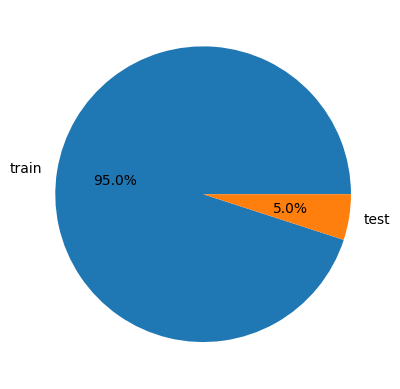

In [ ]:
# Plot the size for train and test in pie
plt.pie([x_train.shape[0],x_test.shape[0]],labels=['train','test'],autopct='%1.1f%%')
plt.show()

# Data Pipeline

In [ ]:
def data_pipeline(x, y):
    """
    Creates a TensorFlow data pipeline for efficient data loading, shuffling, batching, and prefetching.

    Parameters
    ----------
    x : np.array
        The feature data to be used in the pipeline.
    y : np.array
        The target data to be used in the pipeline.

    Returns
    -------
    tf.data.Dataset
        A TensorFlow dataset with shuffled, batched, and prefetched data.
    """

    # Create a dataset from feature and target arrays
    dataset = tf.data.Dataset.from_tensor_slices((x, y))

    # Shuffle the dataset with a buffer size of 1000, randomizing the data order
    dataset = dataset.shuffle(1000)

    # Batch the dataset with a batch size of 32, grouping samples for efficient model training
    dataset = dataset.batch(32)

    # Prefetch the dataset for improved performance, overlapping data preparation with model training
    dataset = dataset.prefetch(tf.data.AUTOTUNE)

    return dataset  # Return the processed dataset

# Create the training dataset pipeline with shuffling, batching, and prefetching
train_dataset = data_pipeline(x_train, y_train)

# Create the testing dataset pipeline without further shuffling (already shuffled in train_test_split)
test_dataset = data_pipeline(x_test, y_test)


In [ ]:
# Get first batch from the training pipeline
for x,y in train_dataset.take(1):
    print(f"x shape: {x.shape}")
    print(f"y shape: {y.shape}")

x shape: (32, 7, 19)
y shape: (32, 1)


In [ ]:
x

<tf.Tensor: shape=(32, 7, 19), dtype=float32, numpy=
array([[[8.6800e+02, 1.0000e+00, 0.0000e+00, ..., 4.0000e+00,
         1.0000e+00, 1.0471e+04],
        [8.6800e+02, 1.0000e+00, 0.0000e+00, ..., 5.0000e+00,
         1.0000e+00, 1.1147e+04],
        [8.6800e+02, 0.0000e+00, 0.0000e+00, ..., 6.0000e+00,
         1.0000e+00, 9.8480e+03],
        ...,
        [8.6800e+02, 0.0000e+00, 0.0000e+00, ..., 1.0000e+00,
         1.0000e+00, 7.9900e+03],
        [8.6800e+02, 0.0000e+00, 0.0000e+00, ..., 2.0000e+00,
         1.0000e+00, 7.2300e+03],
        [8.6800e+02, 0.0000e+00, 0.0000e+00, ..., 3.0000e+00,
         1.0000e+00, 0.0000e+00]],

       [[5.0800e+02, 1.0000e+00, 0.0000e+00, ..., 2.0000e+00,
         1.0000e+00, 6.6000e+03],
        [5.0800e+02, 1.0000e+00, 0.0000e+00, ..., 3.0000e+00,
         1.0000e+00, 6.6880e+03],
        [5.0800e+02, 1.0000e+00, 0.0000e+00, ..., 4.0000e+00,
         1.0000e+00, 7.8920e+03],
        ...,
        [5.0800e+02, 0.0000e+00, 0.0000e+00, ..., 6.000

In [ ]:
y.dtype

tf.float32

# Modeling

## Model 01

In [4]:

class LSTMModel(tf.keras.Model):

    def __init__(self):
        super(LSTMModel, self).__init__()

        # Batch normalization layer to normalize inputs
        self.B1 = tf.keras.layers.BatchNormalization()

        # First LSTM layer with 16 units, returns sequences for stacking another LSTM layer
        self.lstm_layer_1 = tf.keras.layers.LSTM(16, return_sequences=True)

        # Layer normalization after the first LSTM layer
        self.layer_norm_1 = tf.keras.layers.LayerNormalization()

        # Second LSTM layer with 32 units
        self.lstm_layer_2 = tf.keras.layers.LSTM(32)

        # Layer normalization after the second LSTM layer
        self.layer_norm_2 = tf.keras.layers.LayerNormalization()

        # First dense layer with 128 units, without bias (followed by Leaky ReLU activation)
        self.dense_1 = tf.keras.layers.Dense(128, use_bias=False)

        # Layer normalization after the first dense layer
        self.layer_norm_3 = tf.keras.layers.LayerNormalization()

        # Output layer with a single unit for regression output (predicting a continuous value)
        self.out = tf.keras.layers.Dense(1)

    def call(self, inputs):
        """
        Defines the forward pass through the model.

        Parameters
        ----------
        inputs : Tensor
            The input data for the model.

        Returns
        -------
        Tensor
            The output predictions of the model.
        """

        # Pass inputs through the batch normalization layer
        x = self.B1(inputs)

        # First LSTM layer followed by layer normalization
        x = self.lstm_layer_1(x)
        x = self.layer_norm_1(x)

        # Second LSTM layer followed by layer normalization
        x = self.lstm_layer_2(x)
        x = self.layer_norm_2(x)

        # First dense layer followed by Leaky ReLU activation and layer normalization
        x = self.dense_1(x)
        x = tf.nn.leaky_relu(x)
        x = self.layer_norm_3(x)

        # Output layer
        x = self.out(x)

        return x  # Return the output predictions

    def plot_model(self,x):
        """
        Plot the model architecture.
        """
        input_layer = tf.keras.layers.Input(shape=(x.shape[1], x.shape[2]))
        output_layer = self.call(input_layer)
        model = tf.keras.Model(inputs=input_layer, outputs=output_layer)

        return tf.keras.utils.plot_model(model, show_shapes=True,
                                          show_dtype=True,
                                         show_layer_names=True,

                                         rankdir='TB', expand_nested=True,
                                         dpi=96, layer_range=None, show_layer_activations=True,
                                         show_trainable=True)

# Instantiate the model
model_01 = LSTMModel()
x =np.random.rand(1,7,19)
# Pass a batch of inputs through the model to build the layers and initialize weights
model_01(x)

# Display a summary of the model's architecture
model_01.summary()


Model: "lstm_model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_1 (Bat  multiple                  76        
 chNormalization)                                                
                                                                 
 lstm_2 (LSTM)               multiple                  2304      
                                                                 
 layer_normalization_3 (Lay  multiple                  32        
 erNormalization)                                                
                                                                 
 lstm_3 (LSTM)               multiple                  6272      
                                                                 
 layer_normalization_4 (Lay  multiple                  64        
 erNormalization)                                                
                                                      

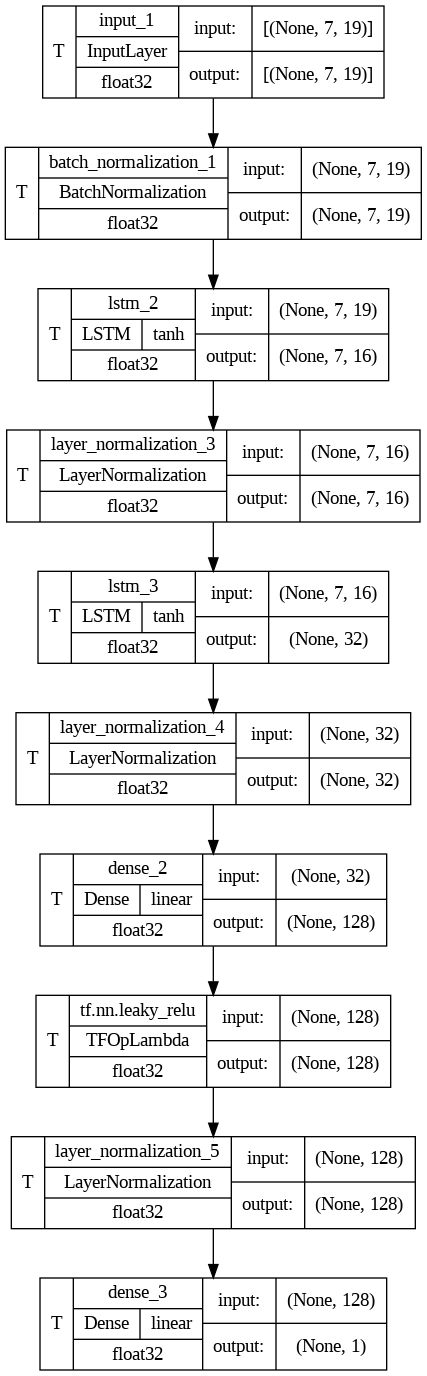

In [5]:
model_01.plot_model(x)

## Model 02

In [15]:

class GRUModel(tf.keras.Model):


    def __init__(self):
        super(GRUModel, self).__init__()

        # Batch normalization layer to normalize inputs
        self.B1 = tf.keras.layers.BatchNormalization()

        # First GRU layer with 16 units, returns sequences for stacking another GRU layer
        self.gru_layer_1 = tf.keras.layers.GRU(16, return_sequences=True)

        # Layer normalization after the first GRU layer
        self.layer_norm_1 = tf.keras.layers.LayerNormalization()

        # Second GRU layer with 32 units
        self.gru_layer_2 = tf.keras.layers.GRU(32)

        # Layer normalization after the second GRU layer
        self.layer_norm_2 = tf.keras.layers.LayerNormalization()

        # First dense layer with 128 units, without bias (followed by Leaky ReLU activation)
        self.dense_1 = tf.keras.layers.Dense(128, use_bias=False)

        # Layer normalization after the first dense layer
        self.layer_norm_3 = tf.keras.layers.LayerNormalization()

        # Output layer with a single unit for regression output (predicting a continuous value)
        self.out = tf.keras.layers.Dense(1)

    def call(self, inputs):
        """
        Defines the forward pass through the model.

        Parameters
        ----------
        inputs : Tensor
            The input data for the model.

        Returns
        -------
        Tensor
            The output predictions of the model.
        """

        # Pass inputs through the batch normalization layer
        x = self.B1(inputs)

        # First GRU layer followed by layer normalization
        x = self.gru_layer_1(x)
        x = self.layer_norm_1(x)

        # Second GRU layer followed by layer normalization
        x = self.gru_layer_2(x)
        x = self.layer_norm_2(x)

        # First dense layer followed by Leaky ReLU activation and layer normalization
        x = self.dense_1(x)
        x = tf.nn.leaky_relu(x)

        # Apply layer normalization after Leaky ReLU
        x = self.layer_norm_3(x)

        # Output layer
        x = self.out(x)

        return x  # Return the output predictions

    def plot_model(self,x):
        """
        Plot the model architecture.
        """
        input_layer = tf.keras.layers.Input(shape=(x.shape[1], x.shape[2]))
        output_layer = self.call(input_layer)
        model = tf.keras.Model(inputs=input_layer, outputs=output_layer)

        return tf.keras.utils.plot_model(model, show_shapes=True,
                                          show_dtype=True,
                                         show_layer_names=True,
                                         rankdir='TB', expand_nested=True,
                                         dpi=96, layer_range=None, show_layer_activations=True,
                                         show_trainable=True)

# Instantiate the model
model_02 = GRUModel()

# Pass a batch of inputs through the model to build the layers and initialize weights
model_02(x)

# Display a summary of the model's architecture
model_02.summary()


Model: "gru_model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_6 (Bat  multiple                  76        
 chNormalization)                                                
                                                                 
 gru_6 (GRU)                 multiple                  1776      
                                                                 
 layer_normalization_19 (La  multiple                  32        
 yerNormalization)                                               
                                                                 
 gru_7 (GRU)                 multiple                  4800      
                                                                 
 layer_normalization_20 (La  multiple                  64        
 yerNormalization)                                               
                                                       

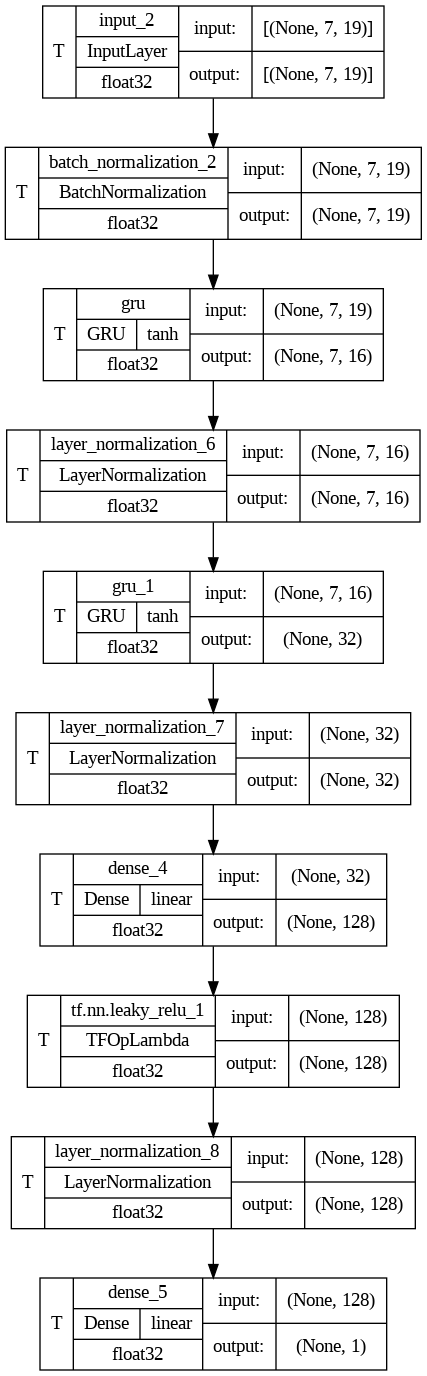

In [7]:
model_02.plot_model(x)

## Model 03



In [16]:

class BIGRUModel(tf.keras.Model):


    def __init__(self):
        super(BIGRUModel, self).__init__()

        # Batch normalization layer to normalize inputs
        self.B1 = tf.keras.layers.BatchNormalization()

        # First bidirectional GRU layer with 16 units, returns sequences for stacking another GRU layer
        self.bi_gru_layer_1 = tf.keras.layers.Bidirectional(
            tf.keras.layers.GRU(16, return_sequences=True)
        )

        # Layer normalization after the first bidirectional GRU layer
        self.layer_norm_1 = tf.keras.layers.LayerNormalization()

        # Second bidirectional GRU layer with 32 units
        self.bi_gru_layer_2 = tf.keras.layers.Bidirectional(
            tf.keras.layers.GRU(32)
        )

        # Layer normalization after the second bidirectional GRU layer
        self.layer_norm_2 = tf.keras.layers.LayerNormalization()

        # First dense layer with 128 units, without bias (followed by Leaky ReLU activation)
        self.dense_1 = tf.keras.layers.Dense(128, use_bias=False)

        # Layer normalization after the first dense layer
        self.layer_norm_3 = tf.keras.layers.LayerNormalization()

        # Output layer with a single unit for regression output (predicting a continuous value)
        self.out = tf.keras.layers.Dense(1)

    def call(self, inputs):
        """
        Defines the forward pass through the model.

        Parameters
        ----------
        inputs : Tensor
            The input data for the model.

        Returns
        -------
        Tensor
            The output predictions of the model.
        """

        # Pass inputs through the batch normalization layer
        x = self.B1(inputs)

        # First bidirectional GRU layer followed by layer normalization
        x = self.bi_gru_layer_1(x)
        x = self.layer_norm_1(x)

        # Second bidirectional GRU layer followed by layer normalization
        x = self.bi_gru_layer_2(x)
        x = self.layer_norm_2(x)

        # First dense layer followed by Leaky ReLU activation and layer normalization
        x = self.dense_1(x)
        x = tf.nn.leaky_relu(x)
        x = self.layer_norm_3(x)

        # Output layer
        x = self.out(x)

        return x  # Return the output predictions

    def plot_model(self,x):
        """
        Plot the model architecture.
        """
        input_layer = tf.keras.layers.Input(shape=(x.shape[1], x.shape[2]))
        output_layer = self.call(input_layer)
        model = tf.keras.Model(inputs=input_layer, outputs=output_layer)

        return tf.keras.utils.plot_model(model, show_shapes=True,
                                          show_dtype=True,
                                         show_layer_names=True,
                                         rankdir='TB', expand_nested=True,
                                         dpi=96, layer_range=None, show_layer_activations=True,
                                         show_trainable=True)


# Instantiate the model
model_03 = BIGRUModel()

# Pass a batch of inputs through the model to build the layers and initialize weights
model_03(x)

# Display a summary of the model's architecture
model_03.summary()


Model: "bigru_model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_7 (Bat  multiple                  76        
 chNormalization)                                                
                                                                 
 bidirectional_4 (Bidirecti  multiple                  3552      
 onal)                                                           
                                                                 
 layer_normalization_22 (La  multiple                  64        
 yerNormalization)                                               
                                                                 
 bidirectional_5 (Bidirecti  multiple                  12672     
 onal)                                                           
                                                                 
 layer_normalization_23 (La  multiple                

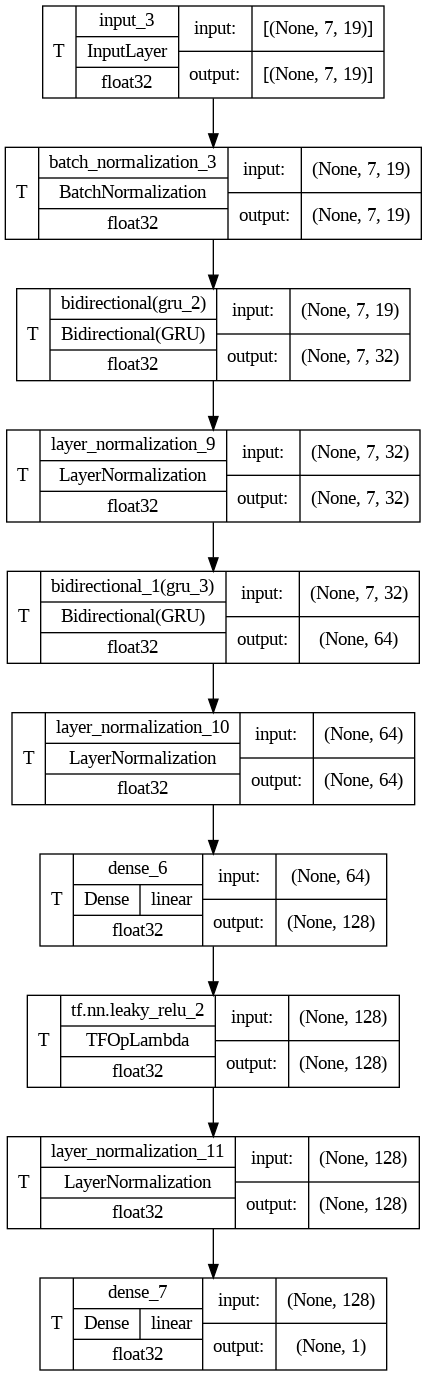

In [9]:
model_03.plot_model(x)

## Model 04

In [17]:

class CONVBIGRUModel(tf.keras.Model):


    def __init__(self):
        super(CONVBIGRUModel, self).__init__()

        # Batch normalization layer to normalize inputs
        self.B1 = tf.keras.layers.BatchNormalization()

        # First 1D convolutional layer with 8 filters, kernel size of 3, and no bias
        self.conv1d_layer_1 = tf.keras.layers.Conv1D(8, 3, padding='same', use_bias=False)

        # Layer normalization after the first Conv1D layer
        self.layer_norm_1 = tf.keras.layers.LayerNormalization()

        # Second 1D convolutional layer with 16 filters, kernel size of 3, and no bias
        self.conv1d_layer_2 = tf.keras.layers.Conv1D(16, 3, padding='same', use_bias=False)

        # Layer normalization after the second Conv1D layer
        self.layer_norm_2 = tf.keras.layers.LayerNormalization()

        # First bidirectional GRU layer with 16 units, returns sequences for stacking another GRU layer
        self.bi_gru_layer_1 = tf.keras.layers.Bidirectional(
            tf.keras.layers.GRU(16, return_sequences=True)
        )

        # Layer normalization after the first bidirectional GRU layer
        self.layer_norm_3 = tf.keras.layers.LayerNormalization()

        # Second bidirectional GRU layer with 32 units
        self.bi_gru_layer_2 = tf.keras.layers.Bidirectional(
            tf.keras.layers.GRU(32)
        )

        # Layer normalization after the second bidirectional GRU layer
        self.layer_norm_4 = tf.keras.layers.LayerNormalization()

        # First dense layer with 128 units, without bias (followed by Leaky ReLU activation)
        self.dense_1 = tf.keras.layers.Dense(128, use_bias=False)

        # Layer normalization after the first dense layer
        self.layer_norm_5 = tf.keras.layers.LayerNormalization()

        # Output layer with a single unit for regression output (predicting a continuous value)
        self.out = tf.keras.layers.Dense(1)

    def call(self, inputs):
        """
        Defines the forward pass through the model.

        Parameters
        ----------
        inputs : Tensor
            The input data for the model.

        Returns
        -------
        Tensor
            The output predictions of the model.
        """

        # Pass inputs through the batch normalization layer
        x = self.B1(inputs)

        # First Conv1D layer followed by layer normalization
        x = self.conv1d_layer_1(x)
        x = self.layer_norm_1(x)

        # Second Conv1D layer followed by layer normalization
        x = self.conv1d_layer_2(x)
        x = self.layer_norm_2(x)

        # First bidirectional GRU layer followed by layer normalization
        x = self.bi_gru_layer_1(x)
        x = self.layer_norm_3(x)

        # Second bidirectional GRU layer followed by layer normalization
        x = self.bi_gru_layer_2(x)
        x = self.layer_norm_4(x)

        # First dense layer followed by Leaky ReLU activation and layer normalization
        x = self.dense_1(x)
        x = tf.nn.leaky_relu(x)
        x = self.layer_norm_5(x)

        # Output layer
        x = self.out(x)

        return x  # Return the output predictions


    def plot_model(self,x):
        """
        Plot the model architecture.
        """
        input_layer = tf.keras.layers.Input(shape=(x.shape[1], x.shape[2]))
        output_layer = self.call(input_layer)
        model = tf.keras.Model(inputs=input_layer, outputs=output_layer)

        return tf.keras.utils.plot_model(model, show_shapes=True,
                                          show_dtype=True,
                                         show_layer_names=True,
                                         rankdir='TB', expand_nested=True,
                                         dpi=96, layer_range=None, show_layer_activations=True,
                                         show_trainable=True)


# Instantiate the model
model_04 = CONVBIGRUModel()

# Pass a batch of inputs through the model to build the layers and initialize weights
model_04(x)

# Display a summary of the model's architecture
model_04.summary()


Model: "convbigru_model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_8 (Bat  multiple                  76        
 chNormalization)                                                
                                                                 
 conv1d_4 (Conv1D)           multiple                  456       
                                                                 
 layer_normalization_25 (La  multiple                  16        
 yerNormalization)                                               
                                                                 
 conv1d_5 (Conv1D)           multiple                  384       
                                                                 
 layer_normalization_26 (La  multiple                  32        
 yerNormalization)                                               
                                                 

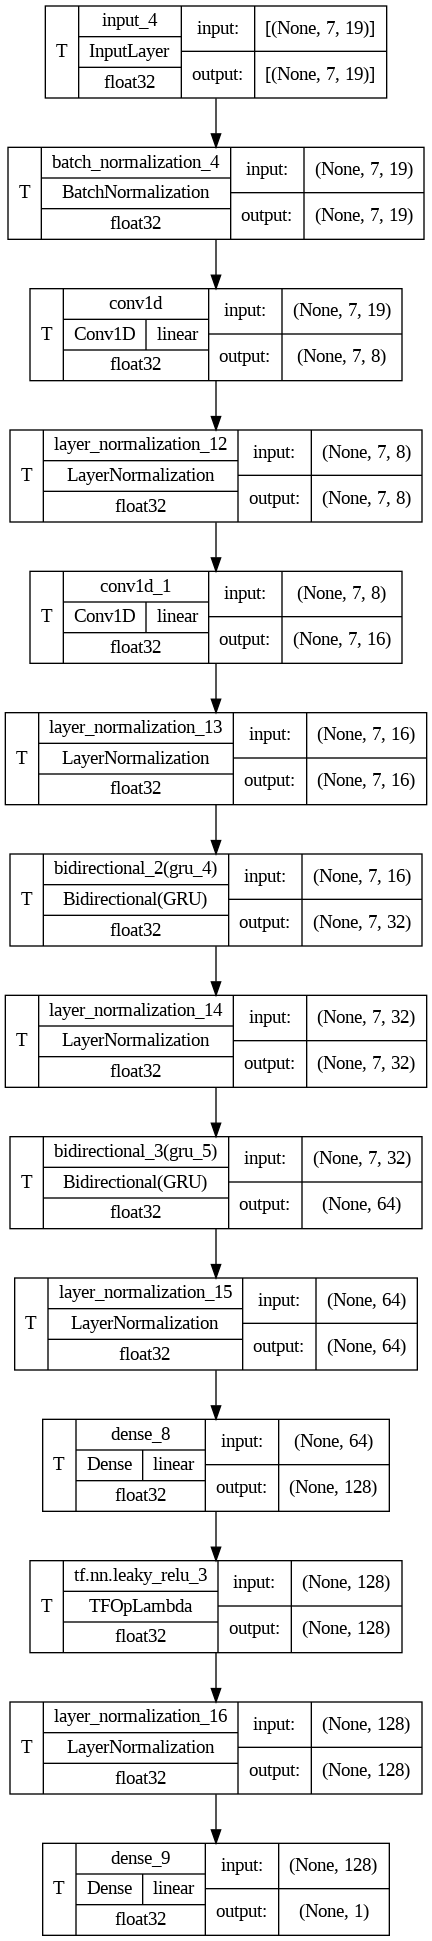

In [11]:
model_04.plot_model(x)

# Model 05

In [13]:

class FFN(tf.keras.layers.Layer):
    """
    A custom Feed-Forward Network (FFN) layer, often used in transformer models for processing embeddings.

    Parameters
    ----------
    ff_dim : int
        The number of units in the hidden dense layer, controlling the expansion dimension of the network.

    embed_dim : int
        The number of units in the output layer, typically matching the embedding dimension.

    use_bias : bool, optional
        Whether to include a bias term in the dense layers (default is True).

    dropout_rate : float, optional
        The dropout rate applied to the layer (default is 0.1).

    Layers:
    -------
    ff1 : Dense
        First dense layer with `ff_dim` units, followed by Leaky ReLU activation.

    ff2 : Dense
        Second dense layer with `embed_dim` units, producing the output shape matching the embedding dimension.
    """

    def __init__(self, ff_dim, embed_dim, use_bias=True, dropout_rate=0.1):
        super(FFN, self).__init__()

        # First dense layer with `ff_dim` units and optional bias
        self.ff1 = tf.keras.layers.Dense(ff_dim, use_bias=use_bias)

        # Second dense layer with `embed_dim` units to match the embedding dimension
        self.ff2 = tf.keras.layers.Dense(embed_dim, use_bias=use_bias)

    def call(self, input):
        """
        Defines the forward pass through the FFN layer.

        Parameters
        ----------
        input : Tensor
            The input tensor to be processed by the FFN.

        Returns
        -------
        Tensor
            The output tensor after passing through two dense layers with a Leaky ReLU activation in between.
        """

        # Pass the input through the first dense layer
        x = self.ff1(input)

        # Apply Leaky ReLU activation
        x = tf.nn.leaky_relu(x)

        # Pass through the second dense layer
        x = self.ff2(x)

        return x  # Return the processed output


In [18]:

class TransformerBlock(tf.keras.layers.Layer):
    """
    A custom Transformer block layer combining multi-head self-attention and a feed-forward network,
    along with residual connections and layer normalization.

    Parameters
    ----------
    embed_dim : int
        The dimensionality of the input embeddings.

    num_heads : int
        The number of attention heads in the multi-head attention mechanism.

    ff_dim : int
        The number of units in the hidden dense layer of the feed-forward network (FFN).

    rate : float, optional
        The dropout rate applied to layers (default is 0.1).

    Layers:
    -------
    layer_norm : LayerNormalization
        Applies layer normalization before multi-head attention for feature extraction.

    multihead_attention : MultiHeadAttention
        Multi-head attention layer to capture contextual information from the input sequence.

    layer_norm2 : LayerNormalization
        Applies layer normalization before the feed-forward network.

    ffn : FFN
        A feed-forward network layer for learning representations after attention.
    """

    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1):
        super(TransformerBlock, self).__init__()

        # Layer normalization before attention for feature extraction
        self.layer_norm = tf.keras.layers.LayerNormalization(epsilon=1e-6)

        # Multi-head attention layer
        self.multihead_attention = tf.keras.layers.MultiHeadAttention(
            num_heads=num_heads,
            key_dim=embed_dim
        )

        # Layer normalization before feed-forward network
        self.layer_norm2 = tf.keras.layers.LayerNormalization(epsilon=1e-6)

        # Feed-forward network with specified dimensions
        self.ffn = FFN(ff_dim, embed_dim, use_bias=True, dropout_rate=rate)

    def call(self, inputs, attention_mask=None, training=False):
        """
        Defines the forward pass through the Transformer block.

        Parameters
        ----------
        inputs : Tensor
            The input tensor to be processed by the Transformer block.

        attention_mask : Tensor, optional
            The mask to apply in the attention layer to prevent attending to certain tokens.

        training : bool, optional
            Whether the model is in training mode (default is False).

        Returns
        -------
        Tensor
            The output tensor after passing through attention and feed-forward layers, with residual connections.
        """

        # Apply layer normalization before attention
        attention_output = self.layer_norm(inputs)

        # Multi-head attention mechanism with optional attention mask
        attention_output = self.multihead_attention(
            attention_output, attention_output, attention_mask=attention_mask
        )

        # Add residual connection for attention output
        output = inputs + attention_output

        # Apply layer normalization before the feed-forward network
        ffn_output = self.layer_norm2(output)

        # Pass through the feed-forward network
        ffn_output = self.ffn(ffn_output, training=training)

        # Add residual connection for feed-forward network output
        block_output = output + ffn_output

        return block_output  # Return the output of the Transformer block


In [19]:

class CNNTransformer(tf.keras.Model):


    def __init__(self) -> None:
        super().__init__()

        # Batch normalization layer to normalize inputs
        self.B1 = tf.keras.layers.BatchNormalization()

        # First 1D convolutional layer with 8 filters, kernel size of 3, no bias
        self.conv1d_layer_1 = tf.keras.layers.Conv1D(8, 3, padding='same', use_bias=False)

        # Layer normalization after the first Conv1D layer
        self.layer_norm_1 = tf.keras.layers.LayerNormalization()

        # Second 1D convolutional layer with 16 filters, kernel size of 3, no bias
        self.conv1d_layer_2 = tf.keras.layers.Conv1D(16, 3, padding='same', use_bias=False)

        # Layer normalization after the second Conv1D layer
        self.layer_norm_2 = tf.keras.layers.LayerNormalization()

        # Transformer block with 16 embedding dimensions, 4 heads, and 32 FFN units
        self.transformer_layer_1 = TransformerBlock(embed_dim=16, num_heads=4, ff_dim=32)

        # Layer normalization after the transformer layer
        self.layer_norm_3 = tf.keras.layers.LayerNormalization()

        # First dense layer with 128 units, followed by Leaky ReLU activation
        self.dense_1 = tf.keras.layers.Dense(128, use_bias=False)

        # Layer normalization after the first dense layer
        self.layer_norm_4 = tf.keras.layers.LayerNormalization()

        # Output dense layer with a single unit for regression output
        self.out = tf.keras.layers.Dense(1)

    def call(self, inputs):
        """
        Defines the forward pass through the CNNTransformer model.

        Parameters
        ----------
        inputs : Tensor
            The input data for the model.

        Returns
        -------
        Tensor
            The output predictions of the model.
        """

        # Apply batch normalization
        x = self.B1(inputs)

        # First Conv1D layer followed by layer normalization
        x = self.conv1d_layer_1(x)
        x = self.layer_norm_1(x)

        # Second Conv1D layer followed by layer normalization
        x = self.conv1d_layer_2(x)
        x = self.layer_norm_2(x)

        # Transformer layer followed by layer normalization
        x = self.transformer_layer_1(x)
        x = self.layer_norm_3(x)

        # Global average pooling to reduce the sequence dimension
        x = tf.keras.layers.GlobalAveragePooling1D()(x)

        # First dense layer with Leaky ReLU activation
        x = self.dense_1(x)
        x = tf.nn.leaky_relu(x)
        x = self.layer_norm_4(x)

        # Output layer for regression
        x = self.out(x)

        return x  # Return the model output

    def plot_model(self,x):
        """
        Plot the model architecture.
        """
        input_layer = tf.keras.layers.Input(shape=(x.shape[1], x.shape[2]))
        output_layer = self.call(input_layer)
        model = tf.keras.Model(inputs=input_layer, outputs=output_layer)

        return tf.keras.utils.plot_model(model,
                                          show_shapes=True,
                                          show_dtype=True,
                                          show_layer_names=True,
                                          rankdir='TB', expand_nested=True,
                                          dpi=96,
                                          layer_range=None,
                                          show_layer_activations=True,
                                          show_trainable=True)


# Instantiate the model
model_05 = CNNTransformer()

# Pass a batch of inputs through the model to build the layers and initialize weights
model_05(x)

# Display a summary of the model's architecture
model_05.summary()


Model: "cnn_transformer_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_9 (Bat  multiple                  76        
 chNormalization)                                                
                                                                 
 conv1d_6 (Conv1D)           multiple                  456       
                                                                 
 layer_normalization_30 (La  multiple                  16        
 yerNormalization)                                               
                                                                 
 conv1d_7 (Conv1D)           multiple                  384       
                                                                 
 layer_normalization_31 (La  multiple                  32        
 yerNormalization)                                               
                                                 

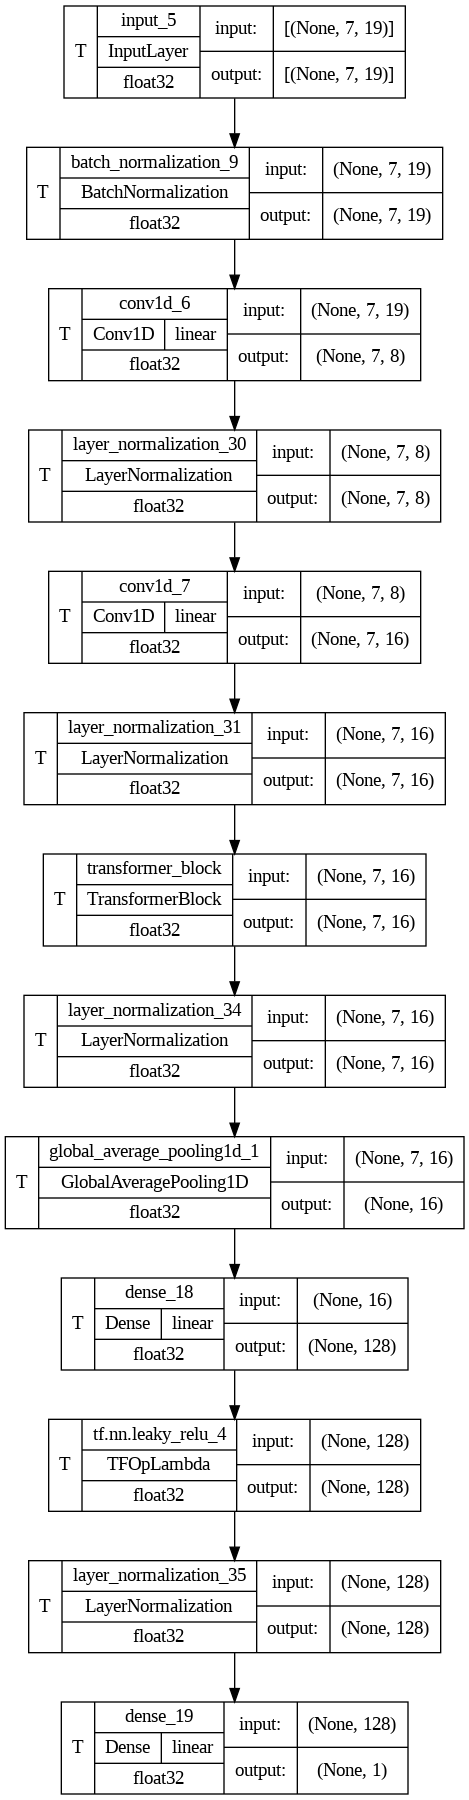

In [20]:
model_05.plot_model(x)

# Model 06

In [21]:

class CNNBIGRUTransformer(tf.keras.Model):


    def __init__(self) -> None:
        super().__init__()

        # Batch normalization layer to normalize inputs
        self.B1 = tf.keras.layers.BatchNormalization()

        # First 1D convolutional layer with 8 filters, kernel size of 3, no bias
        self.conv1d_layer_1 = tf.keras.layers.Conv1D(8, 3, padding='same', use_bias=False)

        # Layer normalization after the first Conv1D layer
        self.layer_norm_1 = tf.keras.layers.LayerNormalization()

        # Second 1D convolutional layer with 16 filters, kernel size of 3, no bias
        self.conv1d_layer_2 = tf.keras.layers.Conv1D(16, 3, padding='same', use_bias=False)

        # Layer normalization after the second Conv1D layer
        self.layer_norm_2 = tf.keras.layers.LayerNormalization()

        # Bidirectional GRU layer with 16 units, returning sequences for the Transformer layer
        self.bi_gru_layer_1 = tf.keras.layers.Bidirectional(
            tf.keras.layers.GRU(16, return_sequences=True)
        )

        # Layer normalization after the Bidirectional GRU layer
        self.layer_norm_3 = tf.keras.layers.LayerNormalization()

        # Transformer block with 32 embedding dimensions, 4 attention heads, and 64 FFN units
        self.transformer_layer_1 = TransformerBlock(embed_dim=32, num_heads=4, ff_dim=64)

        # Layer normalization after the Transformer block layer
        self.layer_norm_4 = tf.keras.layers.LayerNormalization()

        # First dense layer with 128 units, followed by Leaky ReLU activation
        self.dense_1 = tf.keras.layers.Dense(128, use_bias=False)

        # Layer normalization after the first dense layer
        self.layer_norm_5 = tf.keras.layers.LayerNormalization()

        # Output dense layer with a single unit for regression output
        self.out = tf.keras.layers.Dense(1)

    def call(self, inputs):
        """
        Defines the forward pass through the CNNBIGRUTransformer model.

        Parameters
        ----------
        inputs : Tensor
            The input data for the model.

        Returns
        -------
        Tensor
            The output predictions of the model.
        """

        # Apply batch normalization
        x = self.B1(inputs)

        # First Conv1D layer followed by layer normalization
        x = self.conv1d_layer_1(x)
        x = self.layer_norm_1(x)

        # Second Conv1D layer followed by layer normalization
        x = self.conv1d_layer_2(x)
        x = self.layer_norm_2(x)

        # Bidirectional GRU layer followed by layer normalization
        x = self.bi_gru_layer_1(x)
        x = self.layer_norm_3(x)

        # Transformer block followed by layer normalization
        x = self.transformer_layer_1(x)
        x = self.layer_norm_4(x)

        # Global average pooling to reduce sequence dimension
        x = tf.keras.layers.GlobalAveragePooling1D()(x)

        # First dense layer with Leaky ReLU activation
        x = self.dense_1(x)
        x = tf.nn.leaky_relu(x)
        x = self.layer_norm_5(x)

        # Output layer for regression
        x = self.out(x)

        return x  # Return the model output

    def plot_model(self,x):
        """
        Plot the model architecture.
        """
        input_layer = tf.keras.layers.Input(shape=(x.shape[1], x.shape[2]))
        output_layer = self.call(input_layer)
        model = tf.keras.Model(inputs=input_layer, outputs=output_layer)

        return tf.keras.utils.plot_model(model, show_shapes=True,
                                          show_dtype=True,
                                         show_layer_names=True,

                                         rankdir='TB', expand_nested=True,
                                         dpi=96, layer_range=None, show_layer_activations=True,
                                         show_trainable=True)

# Instantiate the model
model_06 = CNNBIGRUTransformer()

# Pass a batch of inputs through the model to build the layers and initialize weights
model_06(x)

# Display a summary of the model's architecture
model_06.summary()


Model: "cnnbigru_transformer"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_10 (Ba  multiple                  76        
 tchNormalization)                                               
                                                                 
 conv1d_8 (Conv1D)           multiple                  456       
                                                                 
 layer_normalization_36 (La  multiple                  16        
 yerNormalization)                                               
                                                                 
 conv1d_9 (Conv1D)           multiple                  384       
                                                                 
 layer_normalization_37 (La  multiple                  32        
 yerNormalization)                                               
                                              

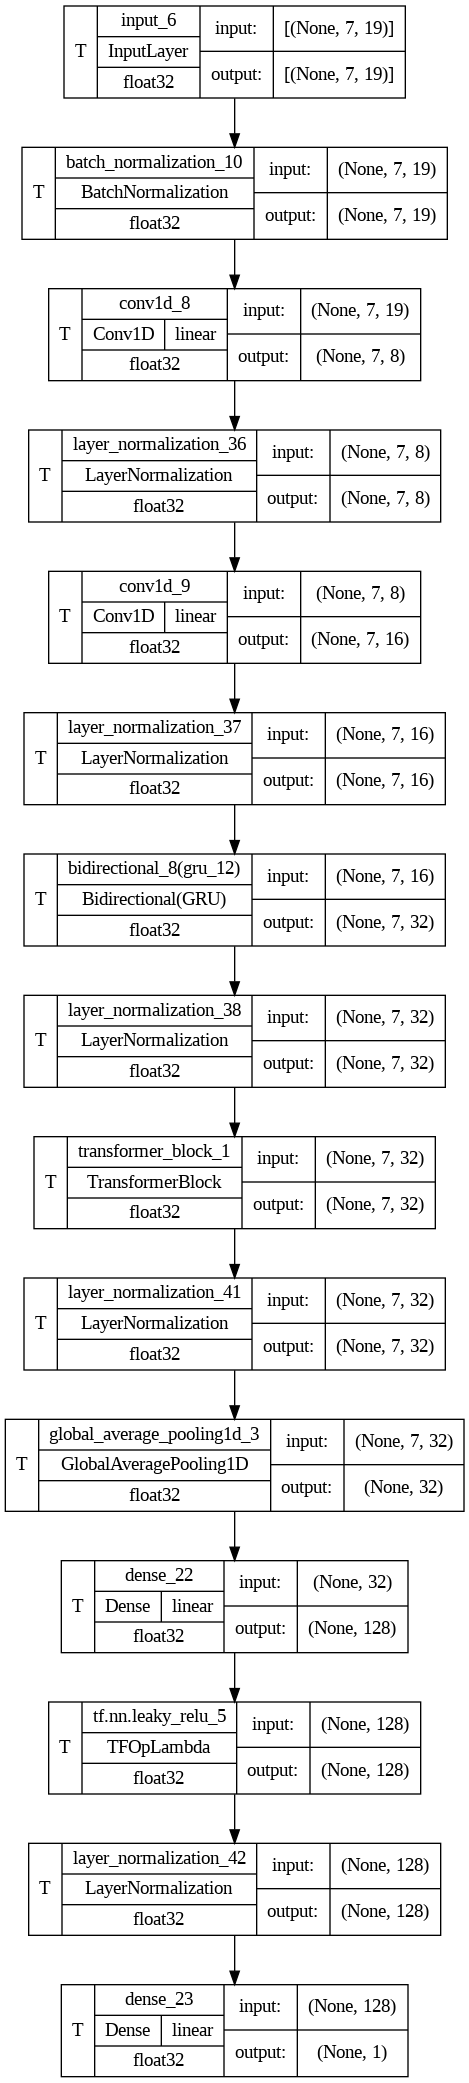

In [22]:
model_06.plot_model(x)

In [ ]:

def RMSPE(y_true, y_pred):
    """
    Calculates the Root Mean Square Percentage Error (RMSPE) between true and predicted values.
    RMSPE is a common metric for regression tasks where relative error (in percentage terms) is more meaningful.

    Parameters
    ----------
    y_true : Tensor
        The ground truth values.

    y_pred : Tensor
        The predicted values by the model.

    Returns
    -------
    Tensor
        The calculated RMSPE, representing the average percentage error in prediction.
    """

    # Ensure y_true does not contain zeros to avoid division by zero
    nonzero_mask = tf.not_equal(y_true, 0)
    y_true_safe = tf.where(nonzero_mask, y_true, tf.ones_like(y_true))

    # Calculate percentage errors only on non-zero elements
    percentage_errors = tf.where(
        nonzero_mask,
        (y_true - y_pred) / y_true_safe,
        tf.zeros_like(y_true)
    )

    # Calculate the Root Mean Square Percentage Error
    rmspe = tf.sqrt(tf.reduce_mean(tf.square(percentage_errors)))

    return rmspe  # Return the RMSPE value


# Training

In [ ]:

class Trainer:
    """
    A custom Trainer class for training and evaluating TensorFlow models with features like:
    - Automatic gradient computation and application
    - RMSPE and R2Score metrics tracking
    - Saving the best model based on validation performance

    Parameters
    ----------
    model : tf.keras.Model
        The model to be trained and evaluated.

    optimizer : tf.keras.optimizers.Optimizer
        The optimizer to use for updating model weights.

    loss_fn : tf.keras.losses.Loss
        The loss function used to compute the training loss.

    save_path : str
        The path to save the best-performing model.

    Attributes
    ----------
    train_loss, test_loss : tf.metrics.Mean
        Track the average loss over training and testing datasets.

    train_r2, test_r2 : tf.metrics.R2Score
        Track the R-squared metric for training and testing.

    train_rmsp, test_rmsp : tf.metrics.Mean
        Track the Root Mean Square Percentage Error (RMSPE) for training and testing.
    """

    def __init__(self, model, optimizer, loss_fn, save_path):
        self.model = model
        self.optimizer = optimizer
        self.loss_fn = loss_fn
        self.path_to_save_best_model = save_path

        # Metrics for tracking losses and performance on train/test sets
        self.train_loss = tf.metrics.Mean(name='train_loss')
        self.test_loss = tf.metrics.Mean(name='test_loss')
        self.train_r2 = tf.metrics.R2Score(name='train_r2')
        self.test_r2 = tf.metrics.R2Score(name='test_r2')
        self.train_rmsp = tf.metrics.Mean(name='train_rmsp')
        self.test_rmsp = tf.metrics.Mean(name='test_rmsp')

    @tf.function
    def train_step(self, x, y):
        """
        Performs a single training step, including forward pass, loss computation,
        and gradient application.

        Parameters
        ----------
        x : Tensor
            Training data.

        y : Tensor
            Ground truth labels for training data.
        """
        with tf.GradientTape() as tape:
            predictions = self.model(x)
            loss = self.loss_fn(y, predictions)

        # Calculate and apply gradients
        gradients = tape.gradient(loss, self.model.trainable_variables)
        self.optimizer.apply_gradients(zip(gradients, self.model.trainable_variables))

        # Calculate RMSPE and update metrics
        rmspe = RMSPE(y, predictions)
        self.train_loss(loss)
        self.train_rmsp(rmspe)
        self.train_r2.update_state(y, predictions)

    @tf.function
    def test_step(self, x, y):
        """
        Performs a single evaluation step on the testing set.

        Parameters
        ----------
        x : Tensor
            Testing data.

        y : Tensor
            Ground truth labels for testing data.
        """
        predictions = self.model(x)
        loss = self.loss_fn(y, predictions)
        rmspe = RMSPE(y, predictions)

        # Update metrics for testing set
        self.test_loss(loss)
        self.test_rmsp(rmspe)
        self.test_r2.update_state(y, predictions)

    def fit(self, epochs, train_dataset, test_dataset):
        """
        Trains the model over a specified number of epochs, evaluates on the test set,
        and saves the best-performing model based on test loss.

        Parameters
        ----------
        epochs : int
            Number of epochs to train the model.

        train_dataset : tf.data.Dataset
            The dataset used for training.

        test_dataset : tf.data.Dataset
            The dataset used for testing.
        """
        old_loss = float('inf')  # Track the lowest test loss

        # Model training report
        print(f"Model name: {self.model.name}")
        print(f"Optimizer: {self.optimizer.__class__.__name__}")
        print(f"Loss function: {self.loss_fn.__class__.__name__}")
        print(f"Epochs: {epochs}")
        print(f"Train dataset size: {len(train_dataset)}")
        print(f"Test dataset size: {len(test_dataset)}")
        print(f"Model Summary: {self.model.summary()}")

        for epoch in range(epochs):
            # Reset metrics at the beginning of each epoch
            self.train_loss.reset_state()
            self.test_loss.reset_state()
            self.train_r2.reset_state()
            self.test_r2.reset_state()
            self.train_rmsp.reset_state()
            self.test_rmsp.reset_state()

            # Training step with progress bar
            progress_bar = tqdm(train_dataset, desc=f'Training epoch {epoch + 1}')
            for x, y in progress_bar:
                self.train_step(x, y)
                progress_bar.set_description(f"Training epoch {epoch + 1}, Train loss: {self.train_loss.result():.4f}")

            # Testing step with progress bar
            progress_bar = tqdm(test_dataset, desc=f'Testing epoch {epoch + 1}')
            for x, y in progress_bar:
                self.test_step(x, y)
                progress_bar.set_description(f"Testing epoch {epoch + 1}, Test loss: {self.test_loss.result():.4f}")

            # Epoch report
            print(f"Epoch: {epoch + 1}/{epochs}")
            print(f"Train loss: {self.train_loss.result()}")
            print(f"Train R2: {self.train_r2.result()}")
            print(f"Test loss: {self.test_loss.result()}")
            print(f"Test R2: {self.test_r2.result()}")
            print(f"Train RMSPE: {self.train_rmsp.result()}")
            print(f"Test RMSPE: {self.test_rmsp.result()}")
            print("#" * 50)

            # Save the best model if test loss improves and test loss < train loss (to avoid overfitting)
            if old_loss > self.test_loss.result() and self.test_loss.result() < self.train_loss.result():
                old_loss = self.test_loss.result()
                path_save_best_model = f"{self.path_to_save_best_model}/{self.model.name}"

                tf.saved_model.save(self.model, path_save_best_model)
                print(f"Model saved at {path_save_best_model} with test loss {self.test_loss.result()}")
                print("#" * 50)


## Model 01 Training

In [ ]:
# Initialize the Adam optimizer with a learning rate of 0.001
# Adam is an adaptive optimizer that adjusts the learning rate based on estimates of lower-order moments
# It is well-suited for large datasets and models with sparse gradients, commonly used.
optimizer = tf.optimizers.Adam(learning_rate=0.001)

# Define the Huber loss as the loss function for the model
# Huber loss is a combination of Mean Squared Error (MSE) and Mean Absolute Error (MAE)
# It is quadratic for small errors, acting like MSE, and linear for large errors, similar to MAE
# This makes it less sensitive to outliers and more robust for regression tasks with potential noise
loss_fn = tf.losses.Huber()

save_path ="/content/drive/MyDrive/Essex University/CE889-7-AU  Neural Networks and Deep Learning (Autumn term)/Assignment/Task 02/Models"
trainer = Trainer(model_01,optimizer,loss_fn,save_path)
trainer.fit(5,train_dataset,test_dataset)

Model name: lstm_model
Optimizer: Adam
Loss function: Huber
Epochs: 5
Train dataset size: 30199
Test dataset size: 1590
Model: "lstm_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (Batch  multiple                  76        
 Normalization)                                                  
                                                                 
 lstm (LSTM)                 multiple                  2304      
                                                                 
 layer_normalization (Layer  multiple                  32        
 Normalization)                                                  
                                                                 
 lstm_1 (LSTM)               multiple                  6272      
                                                                 
 layer_normalization_1 (Lay  multiple                  64        
 e

Testing epoch 1, Test loss: 0.0019: 100%|██████████| 1590/1590 [00:21<00:00, 72.39it/s]


Epoch: 1/5
Train loss: 0.002769719110801816
Train R2: 0.33001792430877686
Test loss: 0.0019090331625193357
Test R2: 0.5521361827850342
Train RMSPE: 0.34572634100914
Test RMSPE: 0.2693256735801697
##################################################
Model saved at /content/drive/MyDrive/Essex University/CE889-7-AU  Neural Networks and Deep Learning (Autumn term)/Assignment/Task 02/Models/lstm_model with test loss 0.0019090331625193357
##################################################


Testing epoch 2, Test loss: 0.0017: 100%|██████████| 1590/1590 [00:20<00:00, 77.69it/s]


Epoch: 2/5
Train loss: 0.0018246776890009642
Train R2: 0.5750693082809448
Test loss: 0.0017173931701108813
Test R2: 0.5970841646194458
Train RMSPE: 0.282326877117157
Test RMSPE: 0.2708643972873688
##################################################
Model saved at /content/drive/MyDrive/Essex University/CE889-7-AU  Neural Networks and Deep Learning (Autumn term)/Assignment/Task 02/Models/lstm_model with test loss 0.0017173931701108813
##################################################


Testing epoch 3, Test loss: 0.0018: 100%|██████████| 1590/1590 [00:20<00:00, 77.69it/s]


Epoch: 3/5
Train loss: 0.001672850688919425
Train R2: 0.610420823097229
Test loss: 0.0017733537824824452
Test R2: 0.584231436252594
Train RMSPE: 0.2711915075778961
Test RMSPE: 0.29554465413093567
##################################################


Training epoch 4, Train loss: 0.0017:   2%|▏         | 594/30199 [00:10<08:51, 55.71it/s]


KeyboardInterrupt: 

In [ ]:
# Initialize the Adam optimizer with a learning rate of 0.001
# Adam is an adaptive optimizer that adjusts the learning rate based on estimates of lower-order moments
# It is well-suited for large datasets and models with sparse gradients, commonly used.
optimizer = tf.optimizers.Adam(learning_rate=0.001)

# Define the Huber loss as the loss function for the model
# Huber loss is a combination of Mean Squared Error (MSE) and Mean Absolute Error (MAE)
# It is quadratic for small errors, acting like MSE, and linear for large errors, similar to MAE
# This makes it less sensitive to outliers and more robust for regression tasks with potential noise
loss_fn = tf.losses.Huber()

save_path ="/content/drive/MyDrive/Essex University/CE889-7-AU  Neural Networks and Deep Learning (Autumn term)/Assignment/Task 02/Models"
trainer = Trainer(model_02,optimizer,loss_fn,save_path)
trainer.fit(5,train_dataset,test_dataset)

Model name: gru_model
Optimizer: Adam
Loss function: Huber
Epochs: 5
Train dataset size: 30199
Test dataset size: 1590
Model: "gru_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_1 (Bat  multiple                  36        
 chNormalization)                                                
                                                                 
 gru (GRU)                   multiple                  1296      
                                                                 
 layer_normalization_3 (Lay  multiple                  32        
 erNormalization)                                                
                                                                 
 gru_1 (GRU)                 multiple                  4800      
                                                                 
 layer_normalization_4 (Lay  multiple                  64        
 erN

Testing epoch 1, Test loss: 0.0008: 100%|██████████| 1590/1590 [00:11<00:00, 139.50it/s]


Epoch: 1/5
Train loss: 0.001599682029336691
Train R2: 0.62129807472229
Test loss: 0.0008125505410134792
Test R2: 0.8094125986099243
Train RMSPE: 0.348335325717926
Test RMSPE: 0.29010847210884094
##################################################
Model saved at /content/drive/MyDrive/Essex University/CE889-7-AU  Neural Networks and Deep Learning (Autumn term)/Assignment/Task 02/Models/gru_model with test loss 0.0008125505410134792
##################################################


Testing epoch 2, Test loss: 0.0004: 100%|██████████| 1590/1590 [00:11<00:00, 137.50it/s]


Epoch: 2/5
Train loss: 0.0005581145524047315
Train R2: 0.8700242042541504
Test loss: 0.0004337091522756964
Test R2: 0.8983885049819946
Train RMSPE: 0.2414100170135498
Test RMSPE: 0.23825813829898834
##################################################
Model saved at /content/drive/MyDrive/Essex University/CE889-7-AU  Neural Networks and Deep Learning (Autumn term)/Assignment/Task 02/Models/gru_model with test loss 0.0004337091522756964
##################################################


Testing epoch 3, Test loss: 0.0003: 100%|██████████| 1590/1590 [00:11<00:00, 142.90it/s]


Epoch: 3/5
Train loss: 0.0003838020784314722
Train R2: 0.9106181859970093
Test loss: 0.00032834336161613464
Test R2: 0.9229854941368103
Train RMSPE: 0.19345428049564362
Test RMSPE: 0.18519079685211182
##################################################
Model saved at /content/drive/MyDrive/Essex University/CE889-7-AU  Neural Networks and Deep Learning (Autumn term)/Assignment/Task 02/Models/gru_model with test loss 0.00032834336161613464
##################################################


Testing epoch 4, Test loss: 0.0003: 100%|██████████| 1590/1590 [00:20<00:00, 77.69it/s] 


Epoch: 4/5
Train loss: 0.00034693736233748496
Train R2: 0.9192063808441162
Test loss: 0.0003282112011220306
Test R2: 0.9230014681816101
Train RMSPE: 0.18174345791339874
Test RMSPE: 0.19357365369796753
##################################################
Model saved at /content/drive/MyDrive/Essex University/CE889-7-AU  Neural Networks and Deep Learning (Autumn term)/Assignment/Task 02/Models/gru_model with test loss 0.0003282112011220306
##################################################


Testing epoch 5, Test loss: 0.0003: 100%|██████████| 1590/1590 [00:20<00:00, 77.70it/s] 


Epoch: 5/5
Train loss: 0.00033507266198284924
Train R2: 0.9219667911529541
Test loss: 0.00032735816785134375
Test R2: 0.923209547996521
Train RMSPE: 0.17848923802375793
Test RMSPE: 0.17219261825084686
##################################################
Model saved at /content/drive/MyDrive/Essex University/CE889-7-AU  Neural Networks and Deep Learning (Autumn term)/Assignment/Task 02/Models/gru_model with test loss 0.00032735816785134375
##################################################


In [ ]:
# Initialize the Adam optimizer with a learning rate of 0.001
# Adam is an adaptive optimizer that adjusts the learning rate based on estimates of lower-order moments
# It is well-suited for large datasets and models with sparse gradients, commonly used.
optimizer = tf.optimizers.Adam(learning_rate=0.001)

# Define the Huber loss as the loss function for the model
# Huber loss is a combination of Mean Squared Error (MSE) and Mean Absolute Error (MAE)
# It is quadratic for small errors, acting like MSE, and linear for large errors, similar to MAE
# This makes it less sensitive to outliers and more robust for regression tasks with potential noise
loss_fn = tf.losses.Huber()

save_path ="/content/drive/MyDrive/Essex University/CE889-7-AU  Neural Networks and Deep Learning (Autumn term)/Assignment/Task 02/Models"
trainer = Trainer(model_03,optimizer,loss_fn,save_path)
trainer.fit(5,train_dataset,test_dataset)

Model name: bigru_model
Optimizer: Adam
Loss function: Huber
Epochs: 5
Train dataset size: 30199
Test dataset size: 1590
Model: "bigru_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_2 (Bat  multiple                  36        
 chNormalization)                                                
                                                                 
 bidirectional (Bidirection  multiple                  2592      
 al)                                                             
                                                                 
 layer_normalization_6 (Lay  multiple                  64        
 erNormalization)                                                
                                                                 
 bidirectional_1 (Bidirecti  multiple                  12672     
 onal)                                                           


Testing epoch 1, Test loss: 0.0006: 100%|██████████| 1590/1590 [00:17<00:00, 91.13it/s] 


Epoch: 1/5
Train loss: 0.0011466613505035639
Train R2: 0.732904314994812
Test loss: 0.0006275959312915802
Test R2: 0.852783739566803
Train RMSPE: 0.3147536516189575
Test RMSPE: 0.27628520131111145
##################################################
Model saved at /content/drive/MyDrive/Essex University/CE889-7-AU  Neural Networks and Deep Learning (Autumn term)/Assignment/Task 02/Models/bigru_model with test loss 0.0006275959312915802
##################################################


Testing epoch 2, Test loss: 0.0004: 100%|██████████| 1590/1590 [00:20<00:00, 77.69it/s] 


Epoch: 2/5
Train loss: 0.0005379765061661601
Train R2: 0.8747145533561707
Test loss: 0.00039084089803509414
Test R2: 0.9083074927330017
Train RMSPE: 0.23585078120231628
Test RMSPE: 0.2057603895664215
##################################################
Model saved at /content/drive/MyDrive/Essex University/CE889-7-AU  Neural Networks and Deep Learning (Autumn term)/Assignment/Task 02/Models/bigru_model with test loss 0.00039084089803509414
##################################################


Testing epoch 3, Test loss: 0.0003: 100%|██████████| 1590/1590 [00:11<00:00, 134.85it/s]


Epoch: 3/5
Train loss: 0.0003985493094660342
Train R2: 0.907183051109314
Test loss: 0.0003432358498685062
Test R2: 0.9194810390472412
Train RMSPE: 0.20159097015857697
Test RMSPE: 0.17522741854190826
##################################################
Model saved at /content/drive/MyDrive/Essex University/CE889-7-AU  Neural Networks and Deep Learning (Autumn term)/Assignment/Task 02/Models/bigru_model with test loss 0.0003432358498685062
##################################################


Testing epoch 4, Test loss: 0.0003: 100%|██████████| 1590/1590 [00:13<00:00, 114.87it/s]


Epoch: 4/5
Train loss: 0.00035436826874502003
Train R2: 0.9174757599830627
Test loss: 0.00033824413549154997
Test R2: 0.9206446409225464
Train RMSPE: 0.18579570949077606
Test RMSPE: 0.20310889184474945
##################################################
Model saved at /content/drive/MyDrive/Essex University/CE889-7-AU  Neural Networks and Deep Learning (Autumn term)/Assignment/Task 02/Models/bigru_model with test loss 0.00033824413549154997
##################################################


Testing epoch 5, Test loss: 0.0003: 100%|██████████| 1590/1590 [00:20<00:00, 77.69it/s] 

Epoch: 5/5
Train loss: 0.000334148237016052
Train R2: 0.9221832752227783
Test loss: 0.0003422033041715622
Test R2: 0.9197369813919067
Train RMSPE: 0.17958204448223114
Test RMSPE: 0.19905564188957214
##################################################


In [ ]:
# Initialize the Adam optimizer with a learning rate of 0.001
# Adam is an adaptive optimizer that adjusts the learning rate based on estimates of lower-order moments
# It is well-suited for large datasets and models with sparse gradients, commonly used.
optimizer = tf.optimizers.Adam(learning_rate=0.001)

# Define the Huber loss as the loss function for the model
# Huber loss is a combination of Mean Squared Error (MSE) and Mean Absolute Error (MAE)
# It is quadratic for small errors, acting like MSE, and linear for large errors, similar to MAE
# This makes it less sensitive to outliers and more robust for regression tasks with potential noise
loss_fn = tf.losses.Huber()

save_path ="/content/drive/MyDrive/Essex University/CE889-7-AU  Neural Networks and Deep Learning (Autumn term)/Assignment/Task 02/Models"
trainer = Trainer(model_04,optimizer,loss_fn,save_path)
trainer.fit(5,train_dataset,test_dataset)

Model name: convbigru_model
Optimizer: Adam
Loss function: Huber
Epochs: 5
Train dataset size: 30199
Test dataset size: 1590
Model: "convbigru_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_3 (Bat  multiple                  36        
 chNormalization)                                                
                                                                 
 conv1d (Conv1D)             multiple                  216       
                                                                 
 layer_normalization_9 (Lay  multiple                  16        
 erNormalization)                                                
                                                                 
 conv1d_1 (Conv1D)           multiple                  384       
                                                                 
 layer_normalization_10 (La  multiple                  32 

Testing epoch 1, Test loss: 0.0004: 100%|██████████| 1590/1590 [00:20<00:00, 77.70it/s] 


Epoch: 1/5
Train loss: 0.001556942705065012
Train R2: 0.6367223262786865
Test loss: 0.0003772813070099801
Test R2: 0.9115082025527954
Train RMSPE: 0.2769213318824768
Test RMSPE: 0.18625672161579132
##################################################
Model saved at /content/drive/MyDrive/Essex University/CE889-7-AU  Neural Networks and Deep Learning (Autumn term)/Assignment/Task 02/Models/convbigru_model with test loss 0.0003772813070099801
##################################################


Testing epoch 2, Test loss: 0.0003: 100%|██████████| 1590/1590 [00:13<00:00, 113.60it/s]


Epoch: 2/5
Train loss: 0.00035132793709635735
Train R2: 0.9181814789772034
Test loss: 0.0003390767960809171
Test R2: 0.9204583168029785
Train RMSPE: 0.1812620609998703
Test RMSPE: 0.16109775006771088
##################################################
Model saved at /content/drive/MyDrive/Essex University/CE889-7-AU  Neural Networks and Deep Learning (Autumn term)/Assignment/Task 02/Models/convbigru_model with test loss 0.0003390767960809171
##################################################


Testing epoch 3, Test loss: 0.0003: 100%|██████████| 1590/1590 [00:20<00:00, 77.69it/s] 


Epoch: 3/5
Train loss: 0.0003118774329777807
Train R2: 0.9273684620857239
Test loss: 0.000277839571936056
Test R2: 0.9348244667053223
Train RMSPE: 0.1709405779838562
Test RMSPE: 0.1637764424085617
##################################################
Model saved at /content/drive/MyDrive/Essex University/CE889-7-AU  Neural Networks and Deep Learning (Autumn term)/Assignment/Task 02/Models/convbigru_model with test loss 0.000277839571936056
##################################################


Testing epoch 4, Test loss: 0.0003: 100%|██████████| 1590/1590 [00:20<00:00, 77.69it/s] 


Epoch: 4/5
Train loss: 0.0002966736792586744
Train R2: 0.9309096336364746
Test loss: 0.000279314088402316
Test R2: 0.9345009326934814
Train RMSPE: 0.1670246422290802
Test RMSPE: 0.17099711298942566
##################################################


Testing epoch 5, Test loss: 0.0003: 100%|██████████| 1590/1590 [00:20<00:00, 77.69it/s] 

Epoch: 5/5
Train loss: 0.00028861145256087184
Train R2: 0.9327884912490845
Test loss: 0.00027826946461573243
Test R2: 0.934739351272583
Train RMSPE: 0.16528883576393127
Test RMSPE: 0.15520122647285461
##################################################


In [ ]:
# Initialize the Adam optimizer with a learning rate of 0.001
# Adam is an adaptive optimizer that adjusts the learning rate based on estimates of lower-order moments
# It is well-suited for large datasets and models with sparse gradients, commonly used.
optimizer = tf.optimizers.Adam(learning_rate=0.001)

# Define the Huber loss as the loss function for the model
# Huber loss is a combination of Mean Squared Error (MSE) and Mean Absolute Error (MAE)
# It is quadratic for small errors, acting like MSE, and linear for large errors, similar to MAE
# This makes it less sensitive to outliers and more robust for regression tasks with potential noise
loss_fn = tf.losses.Huber()

save_path ="/content/drive/MyDrive/Essex University/CE889-7-AU  Neural Networks and Deep Learning (Autumn term)/Assignment/Task 02/Models"
trainer = Trainer(model_05,optimizer,loss_fn,save_path)
trainer.fit(5,train_dataset,test_dataset)

Model name: cnn_transformer
Optimizer: Adam
Loss function: Huber
Epochs: 5
Train dataset size: 30199
Test dataset size: 1590
Model: "cnn_transformer"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_4 (Bat  multiple                  36        
 chNormalization)                                                
                                                                 
 conv1d_2 (Conv1D)           multiple                  216       
                                                                 
 layer_normalization_14 (La  multiple                  16        
 yerNormalization)                                               
                                                                 
 conv1d_3 (Conv1D)           multiple                  384       
                                                                 
 layer_normalization_15 (La  multiple                  32 

Training epoch 1, Train loss: 0.0003:   2%|▏         | 655/30199 [00:13<05:32, 88.85it/s]Exception ignored in: <generator object tqdm.__iter__ at 0x7977550b6570>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/tqdm/std.py", line 1182, in __iter__
    yield obj
KeyboardInterrupt: 


KeyboardInterrupt: 

In [ ]:
# Initialize the Adam optimizer with a learning rate of 0.001
# Adam is an adaptive optimizer that adjusts the learning rate based on estimates of lower-order moments
# It is well-suited for large datasets and models with sparse gradients, commonly used in deep learning
optimizer = tf.optimizers.Adam(learning_rate=0.001)

# Define the Huber loss as the loss function for the model
# Huber loss is a combination of Mean Squared Error (MSE) and Mean Absolute Error (MAE)
# It is quadratic for small errors, acting like MSE, and linear for large errors, similar to MAE
# This makes it less sensitive to outliers and more robust for regression tasks with potential noise
loss_fn = tf.losses.Huber()

save_path ="/content/drive/MyDrive/Essex University/CE889-7-AU  Neural Networks and Deep Learning (Autumn term)/Assignment/Task 02/Models"
trainer = Trainer(model_06,optimizer,loss_fn,save_path)
trainer.fit(5,train_dataset,test_dataset)

Model name: cnnbigru_transformer
Optimizer: Adam
Loss function: Huber
Epochs: 5
Train dataset size: 30199
Test dataset size: 1590
Model: "cnnbigru_transformer"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_5 (Bat  multiple                  36        
 chNormalization)                                                
                                                                 
 conv1d_4 (Conv1D)           multiple                  216       
                                                                 
 layer_normalization_20 (La  multiple                  16        
 yerNormalization)                                               
                                                                 
 conv1d_5 (Conv1D)           multiple                  384       
                                                                 
 layer_normalization_21 (La  multiple           

Testing epoch 1, Test loss: 0.0004: 100%|██████████| 1590/1590 [00:16<00:00, 98.48it/s]


Epoch: 1/5
Train loss: 0.001573605346493423
Train R2: 0.6286348700523376
Test loss: 0.0003588930703699589
Test R2: 0.9158384203910828
Train RMSPE: 0.28336527943611145
Test RMSPE: 0.18222540616989136
##################################################
Model saved at /content/drive/MyDrive/Essex University/CE889-7-AU  Neural Networks and Deep Learning (Autumn term)/Assignment/Task 02/Models/cnnbigru_transformer with test loss 0.0003588930703699589
##################################################


Testing epoch 2, Test loss: 0.0003: 100%|██████████| 1590/1590 [00:12<00:00, 122.77it/s]


Epoch: 2/5
Train loss: 0.000380506127839908
Train R2: 0.9113874435424805
Test loss: 0.00033473834628239274
Test R2: 0.9214943647384644
Train RMSPE: 0.19177380204200745
Test RMSPE: 0.1712024062871933
##################################################
Model saved at /content/drive/MyDrive/Essex University/CE889-7-AU  Neural Networks and Deep Learning (Autumn term)/Assignment/Task 02/Models/cnnbigru_transformer with test loss 0.00033473834628239274
##################################################


Testing epoch 3, Test loss: 0.0003: 100%|██████████| 1590/1590 [00:13<00:00, 118.90it/s]


Epoch: 3/5
Train loss: 0.0003351495251990855
Train R2: 0.9219496250152588
Test loss: 0.00031245863647200167
Test R2: 0.9267035126686096
Train RMSPE: 0.1789965033531189
Test RMSPE: 0.1751023530960083
##################################################
Model saved at /content/drive/MyDrive/Essex University/CE889-7-AU  Neural Networks and Deep Learning (Autumn term)/Assignment/Task 02/Models/cnnbigru_transformer with test loss 0.00031245863647200167
##################################################


Testing epoch 4, Test loss: 0.0003: 100%|██████████| 1590/1590 [00:20<00:00, 77.69it/s] 


Epoch: 4/5
Train loss: 0.0003179391787853092
Train R2: 0.9259556531906128
Test loss: 0.00030176949803717434
Test R2: 0.9292353987693787
Train RMSPE: 0.17319029569625854
Test RMSPE: 0.16780829429626465
##################################################
Model saved at /content/drive/MyDrive/Essex University/CE889-7-AU  Neural Networks and Deep Learning (Autumn term)/Assignment/Task 02/Models/cnnbigru_transformer with test loss 0.00030176949803717434
##################################################


Training epoch 5, Train loss: 0.0003:  75%|███████▍  | 22624/30199 [05:39<01:37, 77.87it/s]

# Make Predictions

# Process the dataset

In [ ]:
testing_dataset.columns

Index(['Id', 'Store', 'DayOfWeek', 'Date', 'Open', 'Promo', 'StateHoliday',
       'SchoolHoliday', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [ ]:
dataset.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [ ]:
cleand_testing_dataset = dataset_preprocessor(testing_dataset)
cleand_testing_dataset

<ipython-input-16-5af476da8718>:114: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  dataset = dataset.applymap(self.convert_str_to_number)
<ipython-input-16-5af476da8718>:170: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset[col].replace(self.str_to_id[col], inplace=True)
<ipython-input-16-5af476da8718>:170: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day
0,1,1,4,2015-09-17,1,1,0,0,1,1,1270,9,2008,0,0,0,0,2015,9,17
1,2,3,4,2015-09-17,1,1,0,0,2,1,14130,12,2006,1,14,2011,2,2015,9,17
2,3,7,4,2015-09-17,1,1,0,0,2,2,24000,4,2013,0,0,0,0,2015,9,17
3,4,8,4,2015-09-17,1,1,0,0,2,1,7520,10,2014,0,0,0,0,2015,9,17
4,5,9,4,2015-09-17,1,1,0,0,2,2,2030,8,2000,0,0,0,0,2015,9,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1,0,0,0,2,1,1900,6,2014,1,31,2013,2,2015,8,1
41084,41085,1112,6,2015-08-01,1,0,0,0,1,2,1880,4,2006,0,0,0,0,2015,8,1
41085,41086,1113,6,2015-08-01,1,0,0,0,2,2,9260,0,0,0,0,0,0,2015,8,1
41086,41087,1114,6,2015-08-01,1,0,0,0,2,2,870,0,0,0,0,0,0,2015,8,1


In [ ]:
# Define a list of selected feature names that are relevant for the analysis or model training
selected_features_names = ["Id","Store", "Date", "Month", "Day", "StoreType", "DayOfWeek",
                           "StateHoliday", "Promo", "Open"]

# Create a new dataset containing only the selected features from the cleaned dataset
new_testing_dataset = cleand_testing_dataset[selected_features_names]

# Display the resulting dataset with the selected features
new_testing_dataset


,Id,Store,Date,Month,Day,StoreType,DayOfWeek,StateHoliday,Promo,Open
0,1,1,2015-09-17,9,17,1,4,0,1,1
1,2,3,2015-09-17,9,17,2,4,0,1,1
2,3,7,2015-09-17,9,17,2,4,0,1,1
3,4,8,2015-09-17,9,17,2,4,0,1,1
4,5,9,2015-09-17,9,17,2,4,0,1,1
...,...,...,...,...,...,...,...,...,...,...
41083,41084,1111,2015-08-01,8,1,2,6,0,0,1
41084,41085,1112,2015-08-01,8,1,1,6,0,0,1
41085,41086,1113,2015-08-01,8,1,2,6,0,0,1
41086,41087,1114,2015-08-01,8,1,2,6,0,0,1


In [ ]:
# Sort the dataset by 'Store' and 'Date' columns
new_testing_dataset.sort_values(by=['Store', 'Date'], inplace=True)

# Display the sorted dataset to verify the order
new_testing_dataset


<ipython-input-36-f08bfbad4a0e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_testing_dataset.sort_values(by=['Store', 'Date'], inplace=True)


,Id,Store,Date,Month,Day,StoreType,DayOfWeek,StateHoliday,Promo,Open
40232,40233,1,2015-08-01,8,1,1,6,0,0,1
39376,39377,1,2015-08-02,8,2,1,7,0,0,0
38520,38521,1,2015-08-03,8,3,1,1,0,1,1
37664,37665,1,2015-08-04,8,4,1,2,0,1,1
36808,36809,1,2015-08-05,8,5,1,3,0,1,1
...,...,...,...,...,...,...,...,...,...,...
4279,4280,1115,2015-09-13,9,13,3,7,0,0,0
3423,3424,1115,2015-09-14,9,14,3,1,0,1,1
2567,2568,1115,2015-09-15,9,15,3,2,0,1,1
1711,1712,1115,2015-09-16,9,16,3,3,0,1,1


In [ ]:
new_testing_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41088 entries, 40232 to 855
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Id            41088 non-null  int64         
 1   Store         41088 non-null  int64         
 2   Date          41088 non-null  datetime64[ns]
 3   Month         41088 non-null  int64         
 4   Day           41088 non-null  int64         
 5   StoreType     41088 non-null  int64         
 6   DayOfWeek     41088 non-null  int64         
 7   StateHoliday  41088 non-null  int64         
 8   Promo         41088 non-null  int64         
 9   Open          41088 non-null  int64         
dtypes: datetime64[ns](1), int64(9)
memory usage: 3.4 MB


In [ ]:
def time_series_generator(df, window=7, step=1):
    """
    Generates time-series sequences for each store to be used for model training.

    Parameters
    ----------
    df : pd.DataFrame
        The dataset containing time-series data for each store.
    window : int, optional
        The number of past days used to create each sequence (default is 7).
    step : int, optional
        The step size for creating new sequences (default is 1).

    Returns
    -------
    np.array
        Array of time-series feature sequences (X).
    np.array
        Array of corresponding labels for each sequence (y).
    """

    # Sort data by 'Store' and 'Date' columns to ensure chronological order within each store
    df = df.sort_values(by=["Store", "Date"])

    # Create a dictionary where each store ID maps to its corresponding data
    store_data = {store: data for store, data in df.groupby("Store")}

    # Initialize lists to store features (X) and labels (y)
    X =  []

    # Iterate over each store's data
    for store, data in store_data.items():
        # Extract features by dropping the 'Date' column
        features = data.drop(columns=["Date"]).values

        # Create sequences for each store
        for i in range(0, len(features), step):
            # Extract a sequence with the specified window size
            x_seq = features[max(i - window + 1, 0):i + 1].copy()
            # make the x_seq have extra feature with zero value
            x_seq = np.concatenate([x_seq,np.zeros(shape=(x_seq.shape[0],1))],axis=-1)










            # Pad the sequence if its length is less than the specified window
            if len(x_seq) < window:
                x_seq = tf.keras.preprocessing.sequence.pad_sequences(
                    [x_seq], maxlen=window, dtype='float32', padding='pre'
                )[0]

            # Append the processed sequence and target value to X and y respectively
            X.append(x_seq)

    # Convert X and y to numpy arrays for model compatibility
    X = np.array(X)
    return X

# Run the function on new_dataset to generate feature and label arrays
df = new_testing_dataset.iloc[:]
x = time_series_generator(df, window=7, step=1)


In [ ]:
x.shape

(41088, 7, 10)

In [ ]:
class Predictor():
    def __init__(self,model_path):

        # load the model
        self.model = tf.saved_model.load(model_path)

    def predict(self,x):
        predictions = self.model(x)
        return predictions







In [ ]:
models_paths_list = {
    "lstm_model":"/content/drive/MyDrive/Essex University/CE889-7-AU  Neural Networks and Deep Learning (Autumn term)/Assignment/Task 02/Models/lstm_model",
    "gru_model":"/content/drive/MyDrive/Essex University/CE889-7-AU  Neural Networks and Deep Learning (Autumn term)/Assignment/Task 02/Models/gru_model",
    "bigru_model":"/content/drive/MyDrive/Essex University/CE889-7-AU  Neural Networks and Deep Learning (Autumn term)/Assignment/Task 02/Models/bigru_model",
    "convbigru_model":"/content/drive/MyDrive/Essex University/CE889-7-AU  Neural Networks and Deep Learning (Autumn term)/Assignment/Task 02/Models/convbigru_model",
    "cnnbigru_transformer":"/content/drive/MyDrive/Essex University/CE889-7-AU  Neural Networks and Deep Learning (Autumn term)/Assignment/Task 02/Models/cnnbigru_transformer",
    "cnn_transformer":"/content/drive/MyDrive/Essex University/CE889-7-AU  Neural Networks and Deep Learning (Autumn term)/Assignment/Task 02/Models/cnn_transformer",

}


In [ ]:
models = {}
for item in models_paths_list.items():
    model_name = item[0]
    model_path = item[1]
    models[model_name] = tf.saved_model.load(model_path)



In [ ]:
models

{'lstm_model': <tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject at 0x79d6db031a80>,
 'gru_model': <tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject at 0x79d6e2cfd120>,
 'bigru_model': <tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject at 0x79d6e2393730>,
 'convbigru_model': <tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject at 0x79d6e20a96f0>,
 'cnnbigru_transformer': <tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject at 0x79d6c0a4b550>,
 'cnn_transformer': <tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject at 0x79d6c06c9720>}

In [ ]:
predictor = Predictor("/content/drive/MyDrive/Essex University/CE889-7-AU  Neural Networks and Deep Learning (Autumn term)/Assignment/Task 02/Models/convbigru_model_1")

OSError: SavedModel file does not exist at: /content/drive/MyDrive/Essex University/CE889-7-AU  Neural Networks and Deep Learning (Autumn term)/Assignment/Task 02/Models/convbigru_model_1/{saved_model.pbtxt|saved_model.pb}

In [ ]:
model =models["cnnbigru_transformer"]
result = {}
for item in tqdm(x):
    item = np.array(item, dtype=np.float64)  # Ensure item is a NumPy array of floats

    # Search the ID in the array; if the ID is in the result dict, update the selected item
    for j, i in enumerate(item[:, 0]):
        i = int(i)  # Ensure i is an integer
        if i in result:

            item[j, -1] = result[i]


    id = int(item[-1, 0])  # Corrected indexing
    inputs = item[:, 1:]
    inputs = inputs.astype(np.float32)




    inputs = np.expand_dims(inputs, axis=0)
    # check if the shop open or not if open input it to the model if not make the prediciton 0
    if item[-1, -2] == 0:
        prediction = np.zeros(shape=(1, 1))
    else:
        prediction = model(inputs).numpy()

    # Reshape prediction to match expected shape for inverse_transform
    prediction = int(y_normalizer.inverse_transform(prediction.reshape(1, -1))[0][0])

    result[id] = prediction


100%|██████████| 41088/41088 [01:55<00:00, 356.67it/s]


In [ ]:
# save the result as csv file the id and Sales columns
result_df = pd.DataFrame(list(result.items()), columns=['Id', 'Sales'])
# sort the df
result_df = result_df.sort_values(by=['Id'])
# save the data
result_df.to_csv('/content/drive/MyDrive/Essex University/CE889-7-AU  Neural Networks and Deep Learning (Autumn term)/Assignment/Task 02/cnnbigru_transformer .csv', index=False)


In [ ]:
!kaggle competitions submit -c rossmann-store-sales -f "/content/drive/MyDrive/Essex University/CE889-7-AU  Neural Networks and Deep Learning (Autumn term)/Assignment/Task 02/cnnbigru_transformer .csv"  -m "Message"

100% 413k/413k [00:01<00:00, 214kB/s]
Successfully submitted to Rossmann Store Sales

In [ ]:
item[j,-1,]

4930.70068359375